## Вітаю вас на Mid-term проєкті!

Цей проєкт призначений для того, щоб ви могли оновити та закріпити знання, які ви отримали за перші місяці навчання на курсі "Machine Learning для людей".

### Основна задача

В цьому завданні Ви - Data Scientist в барнку. Ваша задача - побудувати модель для передбачення, чи оформить клієнт в банку строковий депозит (term deposit). З подібними задачами ми стикаємось в різних компаніях і доменах, коли хочемо зрозуміти, чи клієнт купить якийсь продукт, чи буде користуватись нашим сервісом/сайтом у наступному місяці, чи придбає підписку.

Вам треба не просто побудувати модель, а і пояснити замовнику (ваш замовник тут - це ми з кураторами) як працює ця модель і чому вона дає саме такі рішення. Без цього розуміння ми не можемо перейти до впроваждення (деплойменту) моделі в продакшен.

### Практичне застовування

В реальних робочих умовах в подібних задачах у Вас дані будуть зберігатись в базі данних в динаміці (різні дії користувачів з датою і часом). Тут дані вже загреговані по клієнтам і часто саме з цього ви будете починати побудову моделі передбачення, адже це відносно просто і зручно: загрегувати дані по клієнтам до певного часу і передбачати в майбутнє (тільки в випадку тренування моделі ML наше "майбутнє" теж фактично в минулому - бо ми хочемо мати мітки в даних, а от вже при використанні моделі в продакшені і бойових умовах ви справді будете робити передбачення в майбутнє). Тож, розвʼязуємо задачку!

### Датасет і ML задача

Для виконання завдання ми використаємо набір даних, який оригінально походить з сайту [UCI Machine Learning Repository], але там неточний опис даних і багато різних піднаборів, тому ми братимемо з Kaggle dataset: https://www.kaggle.com/datasets/sahistapatel96/bankadditionalfullcsv.

Ці дані стосуються прямих маркетингових кампаній (телефонних дзвінків) португальської банківської установи. Кінцева мета класифікації - передбачити, чи підпише клієнт строковий депозит (змінна y).

Ми будемо працювати з файлом `bank-additional-full.csv`, скачати набір даних треба з Kaggle. Або можна скачати цей самий набір з гугл диска [тут](https://drive.google.com/file/d/1pDr0hAOnu1JsEiJeBu_F2Jv0GPxKiujW/view?usp=drive_link)

### Опис змінних

Цей опис є і на Kaggle, але ми переклали для вашої зручності і аби він був у вас перед очима під час роботи над проєктом.

#### **Дані про клієнта банку**:
1. **age** – вік клієнта (числова змінна).  
2. **job** – вид зайнятості (категоріальна змінна: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`).  
3. **marital** – сімейний стан (категоріальна змінна: `divorced`, `married`, `single`, `unknown`; примітка: `divorced` означає розлучений або вдівець/вдова).  
4. **education** – рівень освіти (категоріальна змінна: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`).  
5. **default** – чи є у клієнта прострочений кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
6. **housing** – чи має клієнт іпотечний кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  
7. **loan** – чи має клієнт споживчий кредит? (категоріальна змінна: `no`, `yes`, `unknown`).  

#### **Дані про останній контакт у межах поточної маркетингової кампанії**:
8. **contact** – тип зв’язку при останньому контакті (категоріальна змінна: `cellular`, `telephone`).  
9. **month** – місяць останнього контакту (категоріальна змінна: `jan`, `feb`, `mar`, …, `nov`, `dec`).  
10. **day_of_week** – день тижня останнього контакту (категоріальна змінна: `mon`, `tue`, `wed`, `thu`, `fri`).  
11. **duration** – тривалість останнього контакту в секундах (числова змінна).  
   ⚠ **Важлива примітка**: ця змінна має суттєвий вплив на цільову змінну (наприклад, якщо duration = 0, то y = `no`). Однак значення duration невідоме до здійснення дзвінка. Крім того, після завершення дзвінка значення y вже відоме. Тому цю змінну варто використовувати лише для порівняння моделей, але не включати у фінальну передбачувальну модель.  

#### **Інші атрибути**:
12. **campaign** – кількість контактів у межах поточної кампанії для цього клієнта (числова змінна, включає останній контакт).  
13. **pdays** – кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії (числова змінна; значення 999 означає, що клієнт раніше не контактувався).  
14. **previous** – кількість контактів, здійснених до цієї кампанії для цього клієнта (числова змінна).  
15. **poutcome** – результат попередньої маркетингової кампанії (категоріальна змінна: `failure`, `nonexistent`, `success`).  

#### **Атрибути соціально-економічного контексту**:
16. **emp.var.rate** – темп зміни зайнятості (щоквартальний показник, числова змінна).  
17. **cons.price.idx** – індекс споживчих цін (щомісячний показник, числова змінна).  
18. **cons.conf.idx** – індекс довіри споживачів (щомісячний показник, числова змінна).  
19. **euribor3m** – ставка Euribor на 3 місяці (щоденний показник, числова змінна).  
20. **nr.employed** – кількість працевлаштованих осіб (щоквартальний показник, числова змінна).  

#### **Цільова змінна**:
21. **y** – чи підписав клієнт строковий депозит? (бінарна змінна: `yes`, `no`).

### Ваше завдання на цей проєкт

Необхідно побудувати рішення цієї задачі бінарної класифікації. Для цього

1. Провести Exploratory Data Analysis і висунути гіпотези щодо впливу окремих ознак на цільову ознаку `y`.

2. Описати, які методи ви вважаєте доречним використовувати і обрати метрику оцінки якості моделей (метрику треба обґрунтувати).

3. Провести препроцесинг даних для подальшої їх передачі в модель. Препроцесинг має включати
  - обробку категоріальних змінних (якщо цього потребує модель)
  - групування категорій в категоріальних змінних, якщо потрібно
  - заповнення пропущених значень, якщо такі є
  - виявлення outliers і прийняття рішень, що з ними робити
  - створення додаткових ознак, які на ваш погляд поліпшать якість моделей ML.

4. Натренувати 4 різні типи моделей машинного навчання, з яких обовʼязково
  - Logistic Regression
  - kNN
  - Decision Tree
  - Принаймні один з алгоритмів бустингу

5. Створити таблицю з порівнянням якості моделей (в Google Spreadsheets або прямо в Jupyter Notebook), де зазначити
  - назву моделі
  - гіперпараметри
  - метрика якості моделі на тренувальному наборі
  - метрика якості моделі на валідаційному наборі даних
  - коментар до моделі - хороша вона, чи ні, чи варто її використовувати чи ні, чи є у вас подальші ідеї щодо експериментів з цією моделлю?

6. Для алгоритму бустингу виконати процедуру тюнингу гіперпараметрів двома способами
  - Sklearn: Randomized Search
  - Hyperopt: Bayesian Optimization.
  Виявити оптимальні гіперпараметри і зробити висновки про якість моделі в кожному з випадків.

7. Вивести важливість ознак для моделі, які показала себе найкраще і описати, чи вважаєте ви саме такий пріоритет важливості ознак адекватним з точки зору common sense?

8. Для найкращої провести аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP.

9. Провести аналіз записів, в яких модель помиляється і на основі нього зазначити, яким чином можна поліпшити наявне рішення аби уникати наявних помилок?


### Результат виконання проєкту

Результатом виконання цього завдання є окремий github репозиторій з охайно оформленим Jupyter Notebook, частина коду може бути винесена в .py файли. Репозиторій має містити опис задачі, опис що було зроблено і які моделі використано, таблицю результатів експериментів (можна скріншотом або створити таблицю в Markdown форматі - див. Приклад) і висновки, що Ви досягли і що можна було б ще зробити для поліпшення результатів.


### Приклад проєкту

Для натхнення ви можете ознайомитись з проєктом, побудованим на основі цих даних за [цим посиланням](https://github.com/surtantheta/Bank_Marketing_Dataset_Machine_Learning_Project).




![](https://blogconcept2competence.wordpress.com/wp-content/uploads/2014/03/yoda.jpg)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
import shap

pd.set_option('display.max.rows',80)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

## Автоматичні функції

In [2]:
import warnings

# Діаграми розподілу і розмаху
def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)
      plt.show

# Діаграми щільності розподілу для піднабору 'yes' і піднабору 'no' 
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Клієнт підписав строковий депозит')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'Клієнт відмовився від депозиту')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 45)
  plt.legend()
  plt.show()

# Одномірний аналіз для категоріальних стовпців (категоріальний vs цільовий) 
def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)
    
    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='%1.1f%%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)
      
def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='y' )

# Exploratory Data Analysis

In [3]:
# Зчитування даних
df = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [4]:
# Огляд загального вигляду даних
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


In [5]:
# Розмір вибірки
df.shape

(41188, 21)

In [6]:
# Перевірка структури даних, наявності нульових значень
df.info(verbose = True, show_counts = True)
df.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

False

Маємо 21 стовпець і 41188 рядків. Нульових значень немає. 

## Перевірка дисбалансу для цільового стовпця 'y'

In [7]:
# Кількість унікальних значень стовпця
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [8]:
# Відсоток унікальних значень стовпця
df['y'].value_counts(normalize = True).sort_values(ascending = False) * 100

y
no    88.73
yes   11.27
Name: proportion, dtype: float64

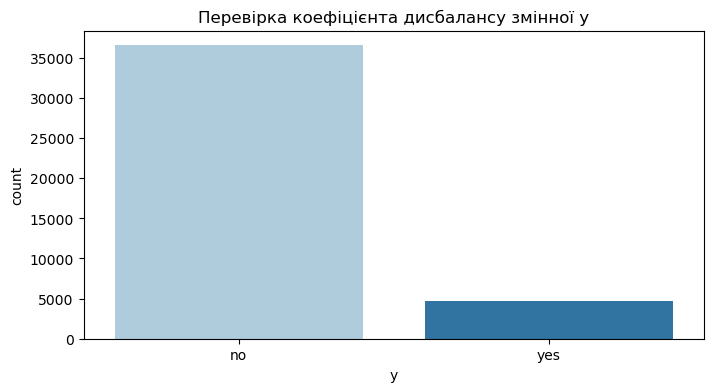

In [9]:
# Візуалізація розподілу унікальних значень цільового стовпця
plt.figure(figsize = (8, 4))
sns.countplot(x = df['y'], data = df, hue = 'y', palette = "Paired")
plt.title('Перевірка коефіцієнта дисбалансу змінної y')
plt.show()

**Спостереження**
- Маємо дисбаланс у змінній `y` на основі % спостережень.
- Значення `y`= yes - це клієнт, який підписав строковий депозит. Таких всього 11,27% даних.
- Значення `y`= no - це клієнт, який не підписав строковий депозит. Таких 88,73% даних.

## Створення окремих фреймів на основі значення цільової змінної для `y = yes` і `y = no`

In [10]:
df1 = df[df['y'] == 'yes']
df0 = df[df['y'] == 'no']

## Робота з числовими змінними

In [11]:
# Перелік числових змінних
df.select_dtypes(include = "number").columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [12]:
# Кількість числових змінних
len(df.select_dtypes(include = "number").columns)

10

### Аналіз стовпця `age`

In [13]:
# Статистичний звіт для стовпця
df['age'].describe()

count   41188.00
mean       40.02
std        10.42
min        17.00
25%        32.00
50%        38.00
75%        47.00
max        98.00
Name: age, dtype: float64

**Спостереження**:
- Мінімальний вік клієнта – 17 років, максимальний – 98.
- Медіана віку клієнта складає 38 років, середній вік ~ 40 років. 

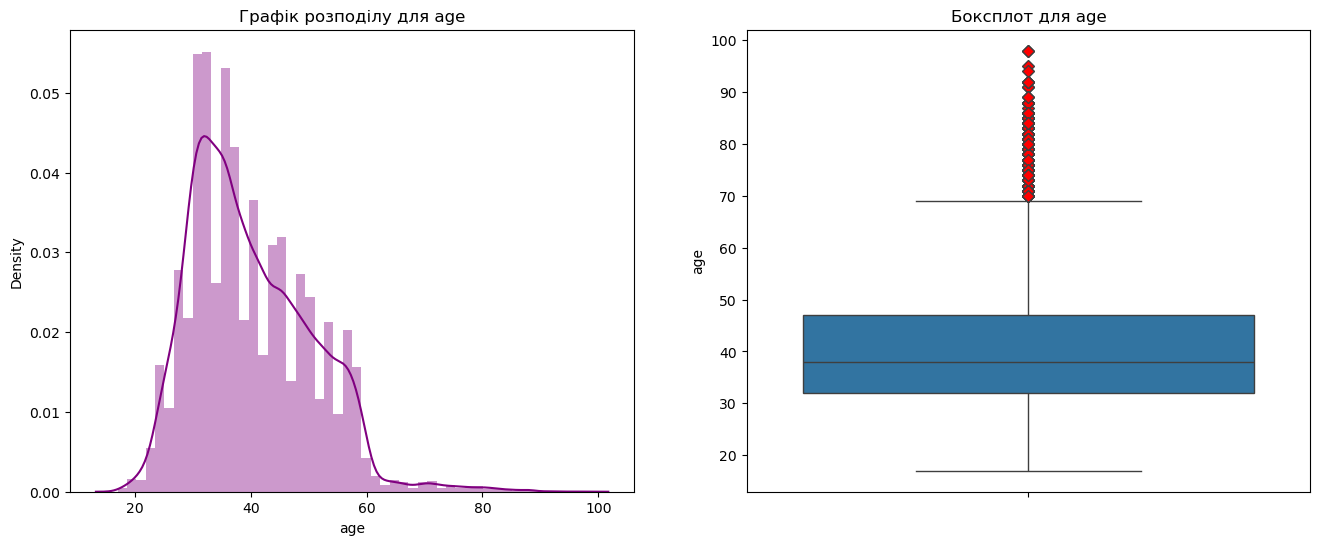

In [14]:
dist_box(df,'age')

**Пошук викидів в `age`**

Розрахуємо IQR (Inter Quartile range). Значення до (Q1 - 1,5 * IQR) та після (Q3 + 1,5 * IQR) є викидами

In [15]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

15.0


In [16]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: 9.5
Максимальне значення, після якого існують викиди: 69.5


In [17]:
df['age'].value_counts().sort_index(ascending=False).head(20)

age
98     2
95     1
94     1
92     4
91     2
89     2
88    22
87     1
86     8
85    15
84     7
83    17
82    17
81    20
80    31
79    14
78    27
77    20
76    34
75    24
Name: count, dtype: int64

**Спостереження**
- Дивлячись на дані і на діаграму розподілу, ми бачимо, що кількість клієнтів, старше 60 років, є невеликою (таких, що вік перевищує 85 років, кількість мінімальна – декілька людей в кожній категорії). Це природня ситуація.
- Діаграми розподілу і розмаху показують, що значення, які перевищують 70, можуть бути викидами. У всякому разі, такі дані є відхиленнями від норми.

Перевіримо чи відрізняються діаграми розмаху по віку для тих, хто підписав депозит, і тих, хто відмовив.

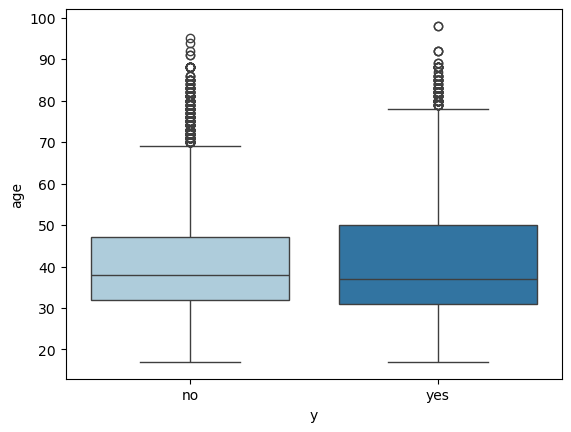

In [18]:
sns.boxplot(data=df, x="y", y="age", hue = 'y', palette = "Paired")
plt.show()

**Спостереження**:
І ті, хто підписав депозит, і ті, хто відмовив, мають медіанний вік приблизно 38-40 років. І боксплоти достатньо збігаються (накладаються). Тому, можливо, вік не є хорошим показником того, підпише клієнт депозит чи ні. 

**Пошук викидів в `age` для випадків підписання депозиту**

In [19]:
Q1 = df1['age'].quantile(0.25)
Q3 = df1['age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

19.0


In [20]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: 2.5
Максимальне значення, після якого існують викиди: 78.5


**Пошук викидів в `age` для випадків відмови від депозиту**

In [21]:
Q1 = df0['age'].quantile(0.25)
Q3 = df0['age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

15.0


In [22]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: 9.5
Максимальне значення, після якого існують викиди: 69.5


**Видалення викидів і побудова діаграми щільності розподілу**

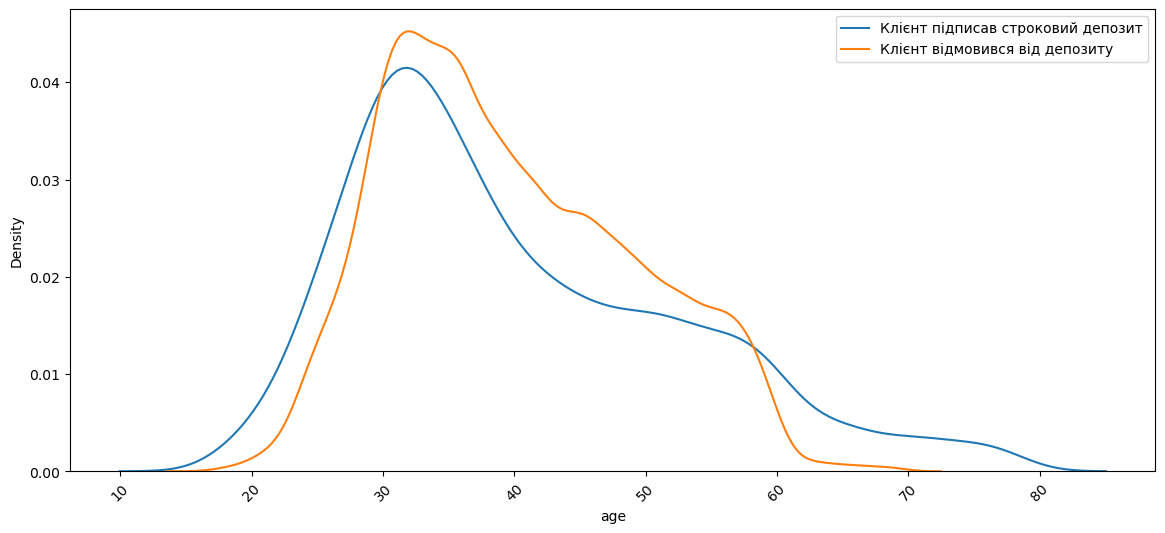

In [23]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'age')

**Спостереження**:
- Банк зосередив свою маркетингову кампанію переважно на клієнтах віку близько 30.
- Для тих, хто підписав строковий депозит, ймовірність потрапити у діапазон 30-60 років менша ймовірності потрапити у цей діапазон тим, хто відмовив.
- Натомість, для тих, хто підписав строковий депозит, ймовірність потрапити у діапазон до 30 років більша ймовірності потрапити у цей діапазон тим, хто відмовив.
- Так само, для тих, хто підписав строковий депозит, ймовірність потрапити у діапазон 60+ років більша ймовірності потрапляння у цей діапазон тих, хто відмовив.
- Все це може бути пояснено тим, що вік 30-60 – період створення сімей, народження і виховання дітей, купівлі нерухомості. Тому ця група людей має більшу потребу в кредитах, а не в строкових депозитах. Натомість, група людей до 30 вірогідно мають більше грошей для заощадження і мало досвіду для більш складних інвестицій, тому строкові депозити для них можуть бути привабливим варіантом. Для групи людей 60+ строкові депозити можуть бути можливістю швидко отримати додаткову готівку, довгострокові інвестиції для них не є настільки раціональними.

### Аналіз стовпця `duration`

In [24]:
# Статистичний звіт для стовпця
df['duration'].describe()

count   41188.00
mean      258.29
std       259.28
min         0.00
25%       102.00
50%       180.00
75%       319.00
max      4918.00
Name: duration, dtype: float64

Перевіримо чи відрізняються діаграми розмаху по тривалості останнього контакту для тих, хто підписав депозит, і тих, хто відмовив.

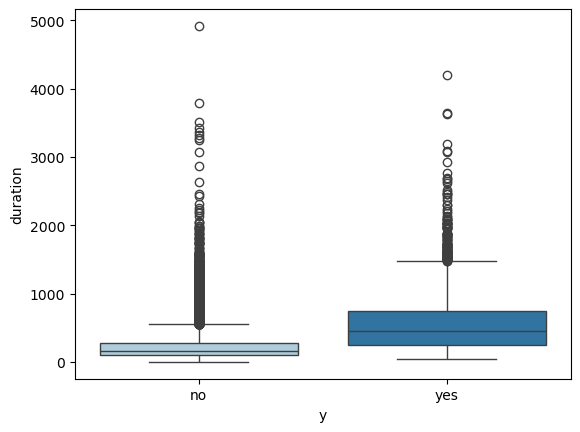

In [25]:
sns.boxplot(data=df, x="y", y="duration", hue = 'y', palette = "Paired")
plt.show()

**Спостереження**:
- Діаграми розмаху для тих, хто підписав депозит, і тих, хто відмовив, суттєво відрізняються. Боксплоти зміщені один відносно одного, мають різну форму.
- Медіана тривалості розмови з тими, хто підписав, значно вища медіани тривалості розмови з тими, хто відмовив.
- Тривалість розмови з тими, хто відмовив, в більшості випадків потрапляє в досить вузькі рамки.
- Разом з тим є багато викидів. Можливо, їх причина в тому, що окремих (привабливих банку) клієнтів довго намагались вмовити.

**Пошук викидів в `duration` для випадків підписання депозиту**

In [26]:
Q1 = df1['duration'].quantile(0.25)
Q3 = df1['duration'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

488.25


In [27]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -479.375
Максимальне значення, після якого існують викиди: 1473.625


**Пошук викидів в `duration` для випадків відмови від депозиту**

In [28]:
Q1 = df0['duration'].quantile(0.25)
Q3 = df0['duration'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

184.0


In [29]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -181.0
Максимальне значення, після якого існують викиди: 555.0


**Видалення викидів і побудова діаграми щільності розподілу**

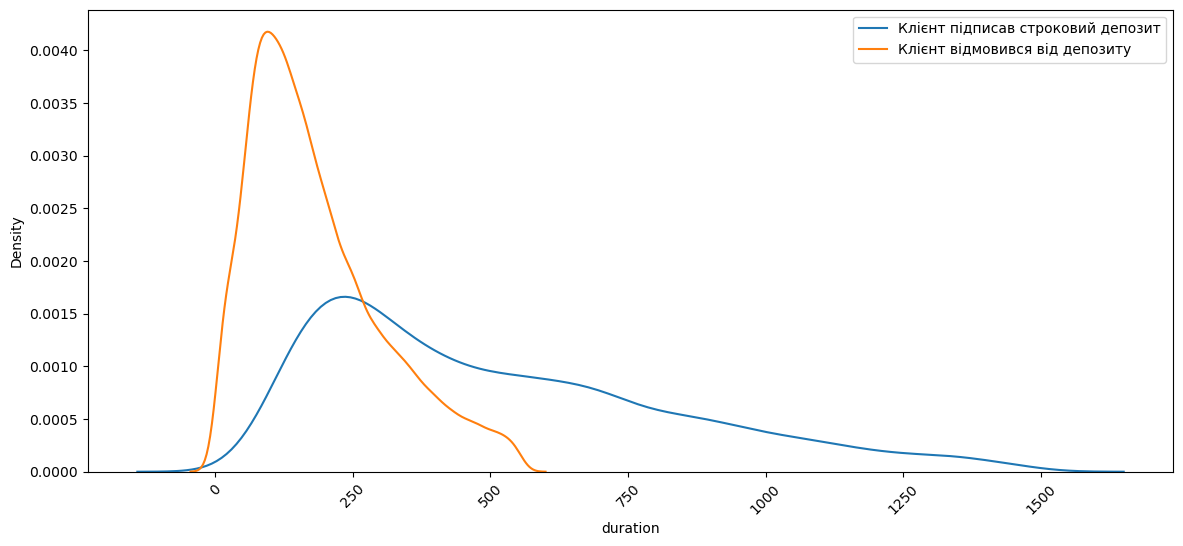

In [30]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'duration')

**Спостереження**:
- Для тих, хто відмовився від депозиту, ймовірність потрапити у діапазон тривалості розмови до 100 секунд значно вища ймовірності потрапити у цей діапазон тим, хто підписав.
- Разом з тим, якщо не брати до уваги викиди (ми їх викинули в діаграмі), для тих, хто відмовився від депозиту, ймовірність потрапити у діапазон тривалості розмови зверх 600 секунд практично нульова. Натомість, для тих, хто підписав депозит, ймовірність потрапити у цей діапазон тривалості розмови значна.
- Діаграми щільності розподілу суттєво відрізняються. І змінна `duration` є хорошим показником того підпише клієнт депозит чи ні. 

### Аналіз стовпця `campaign`

In [31]:
# Статистичний звіт для стовпця
df['campaign'].describe()

count   41188.00
mean        2.57
std         2.77
min         1.00
25%         1.00
50%         2.00
75%         3.00
max        56.00
Name: campaign, dtype: float64

**Спостереження**:
- Медіана кількості контактів з клієнтом дорівнює 2.
- Щонайменше в 75% випадків кількість контактів з клієнтом не перевищила 3.
- Є кейс(и), де максимальна кількість контактів з клієнтом в межах кампанії склала 56.

In [32]:
# Кількісний і відсотковий розподіл унікальних значень стовпця
campaign_count_percentage_df = pd.DataFrame({'count': df['campaign'].value_counts()
                                             ,'percentage': df['campaign'].value_counts(normalize = True) * 100
                                             ,'cumulative_percentage': df['campaign'].value_counts(normalize = True).cumsum() * 100})
campaign_count_percentage_df.sort_values(by = 'percentage', ascending = False).head(10)

,count,percentage,cumulative_percentage
campaign,,,
1,17642,42.83,42.83
2,10570,25.66,68.50
3,5341,12.97,81.46
4,2651,6.44,87.90
5,1599,3.88,91.78
6,979,2.38,94.16
7,629,1.53,95.69
8,400,0.97,96.66
9,283,0.69,97.34


**Спостереження**:
- В більшості випадків (42,83%) з клієнтом був один контакт в межах меркетингової кампанії.
- У 2/3 випадків (68,50%) з клієнтами було не більше 2-х контактів.  

### Аналіз стовпця `pdays`

In [33]:
# Кількісний і відсотковий розподіл унікальних значень стовпця
pdays_count_percentage_df = pd.DataFrame({'count': df['pdays'].value_counts()
                                             ,'percentage': df['pdays'].value_counts(normalize = True) * 100}
                                             )
pdays_count_percentage_df.sort_values(by = 'percentage', ascending = False).head(5)

,count,percentage
pdays,,
999,39673,96.32
3,439,1.07
6,412,1.00
4,118,0.29
9,64,0.16


**Спостереження**:
- У 96,32% випадків значення змінної pdays (кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії) дорівнює 999, тобто з цими клієнтами в попередній кампанії контакту не було.

Перевіримо чи відрізняється розподіл значень цього стовпця для тих, хто підписав депозит, і тих, хто відмовив.

In [34]:
# Кількісний і відсотковий розподіл унікальних значень стовпця для тих, хто підписав депозит
pdays_count_percentage_df1 = pd.DataFrame({'count': df1['pdays'].value_counts()
                                             ,'percentage': df1['pdays'].value_counts(normalize = True) * 100}
                                             )
pdays_count_percentage_df1.sort_values(by = 'percentage', ascending = False).head(5)

,count,percentage
pdays,,
999,3673,79.16
3,298,6.42
6,289,6.23
4,63,1.36
7,40,0.86


In [35]:
# Кількісний і відсотковий розподіл унікальних значень стовпця для тих, хто відмовився від депозиту
pdays_count_percentage_df0 = pd.DataFrame({'count': df0['pdays'].value_counts()
                                             ,'percentage': df0['pdays'].value_counts(normalize = True) * 100}
                                             )
pdays_count_percentage_df0.sort_values(by = 'percentage', ascending = False).head(5)

,count,percentage
pdays,,
999,36000,98.50
3,141,0.39
6,123,0.34
4,55,0.15
12,32,0.09


**Спостереження**:
- Серед тих, хто підписав депозит, 79,16% тих, з ким в попередній кампанії контакту не було.
- А серед тих, хто відмовив, відсоток тих, з ким в попередній кампанії контакту не було, аж 98,50%.
- Виглядає так, що ті клієнти, з ким був контакт в попередній кампанії, більш охоче підписують депозит у поточній.

Зробимо ще один розрахунок, щоб підтвердити цю думку.

In [36]:
# Кількість клієнтів поточної кампанії, з якими не було контакту в попередній кампанії
no_contact = (df['pdays'].values == 999).sum()

# З них відсоток тих, хто підписав депозит
no_contact_yes = ((df['pdays'].values == 999) & (df['y'].values == 'yes')).sum() / (df['pdays'].values == 999).sum() * 100

# З них відсоток тих, хто відмовився від депозиту
no_contact_no = ((df['pdays'].values == 999) & (df['y'].values == 'no')).sum() / (df['pdays'].values == 999).sum() * 100

print(f"Кількість клієнтів поточної кампанії, з якими не було контакту в попередній кампанії: {no_contact}")
print(f"З них відсоток тих, хто підписав депозит: {no_contact_yes:.2f}%")
print(f"З них відсоток тих, хто відмовився від депозиту: {no_contact_no:.2f}%")

Кількість клієнтів поточної кампанії, з якими не було контакту в попередній кампанії: 39673
З них відсоток тих, хто підписав депозит: 9.26%
З них відсоток тих, хто відмовився від депозиту: 90.74%


In [37]:
# Кількість клієнтів поточної кампанії, з якими в попередній кампанії був контакт
some_contact = (df['pdays'].values != 999).sum()

# З них відсоток тих, хто підписав депозит
some_contact_yes = ((df['pdays'].values != 999) & (df['y'].values == 'yes')).sum() / (df['pdays'].values != 999).sum() * 100

# З них відсоток тих, хто відмовився від депозиту
some_contact_no = ((df['pdays'].values != 999) & (df['y'].values == 'no')).sum() / (df['pdays'].values != 999).sum() * 100

print(f"Кількість клієнтів поточної кампанії, з якими в попередній кампанії був контакт: {some_contact}")
print(f"З них відсоток тих, хто підписав депозит: {some_contact_yes:.2f}%")
print(f"З них відсоток тих, хто відмовився від депозиту: {some_contact_no:.2f}%")

Кількість клієнтів поточної кампанії, з якими в попередній кампанії був контакт: 1515
З них відсоток тих, хто підписав депозит: 63.83%
З них відсоток тих, хто відмовився від депозиту: 36.17%


**Спостереження**:
- Клієнти, з якими в попередній кампанії не було контакту, лише в 9,26% випадків підписують депозит у поточній кампанії.
- Клієнти, з якими в попередній кампанії був контакт, у 63,83% випадків підписують депозит у поточній кампанії.
- Змінна `pdays` виглядає хорошим показником для оцінки того, підпише клієнт депозит чи ні. Але в рамках препроцесингу, оскільки частка тих, з ким в попередній кампанії контактували, дуже незначна (<4%), може бути доречним не розглядати кількість днів з моменту останнього контакту, а розділити всіх клієнтів на тих, з ким в попередній кампанії контакт був (значення стовпця !=999), і тих, з ким такого контакту не було (значення стовпця =999).

### Аналіз стовпця `previous`

In [38]:
# Статистичний звіт для стовпця
df['previous'].describe()

count   41188.00
mean        0.17
std         0.49
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         7.00
Name: previous, dtype: float64

**Спостереження**:
- З більшістю клієнтів до цієї кампанії контактів не було взагалі.
- Найбільша кількість контактів з клієнтом до цієї кампанії дорівнює 7.

In [39]:
# Кількісний і відсотковий розподіл унікальних значень стовпця
previous_count_percentage_df = pd.DataFrame({'count': df['previous'].value_counts()
                                             ,'percentage': df['previous'].value_counts(normalize = True) * 100}
                                             )
previous_count_percentage_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
previous,,
0,35563,86.34
1,4561,11.07
2,754,1.83
3,216,0.52
4,70,0.17
5,18,0.04
6,5,0.01
7,1,0.00


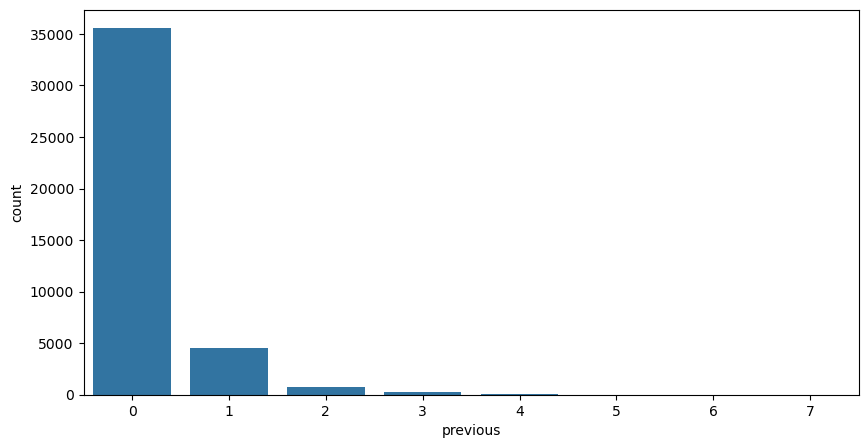

In [40]:
# Візуалізація кількісного розподілу унікальних значень стовпця
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = 'previous')
plt.show()

Перевіримо чи відрізняється розподіл значень цієї змінної для тих, хто підписав депозит, і тих, хто відмовив.

In [41]:
# Кількісний і відсотковий розподіл унікальних значень стовпця для тих, хто підписав депозит
previous_count_percentage_df1 = pd.DataFrame({'count': df1['previous'].value_counts()
                                             ,'percentage': df1['previous'].value_counts(normalize = True) * 100}
                                             )
previous_count_percentage_df1.sort_values(by = 'percentage', ascending = False)

,count,percentage
previous,,
0,3141,67.69
1,967,20.84
2,350,7.54
3,128,2.76
4,38,0.82
5,13,0.28
6,3,0.06


In [42]:
# Кількісний і відсотковий розподіл унікальних значень стовпця для тих, хто відмовився від депозиту
previous_count_percentage_df0 = pd.DataFrame({'count': df0['previous'].value_counts()
                                             ,'percentage': df0['previous'].value_counts(normalize = True) * 100}
                                             )
previous_count_percentage_df0.sort_values(by = 'percentage', ascending = False)

,count,percentage
previous,,
0,32422,88.71
1,3594,9.83
2,404,1.11
3,88,0.24
4,32,0.09
5,5,0.01
6,2,0.01
7,1,0.00


**Спостереження**:
- Серед тих, хто підписав депозит, 67,69% тих, з ким раніше ніколи не було контакту.
- Серед тих, хто відмовив, таких клієнтів, з якими раніше взагалі не було контакту, більше – 88,71%.
- Схоже, що клієнти, з якими до поточної кампанії був хоч один контакт, більше схильні підписати депозит.

Перевіримо це, подивимось ще один розрахунок.

In [43]:
# Кількість клієнтів поточної кампанії, з якими раніше взагалі не було контакту
no_contact_at_all = (df['previous'].values == 0).sum()

# З них відсоток тих, хто підписав депозит
no_contact_at_all_yes = ((df['previous'].values == 0) & (df['y'].values == 'yes')).sum() / (df['previous'].values == 0).sum() * 100

# З них відсоток тих, хто відмовився від депозиту
no_contact_at_all_no = ((df['previous'].values == 0) & (df['y'].values == 'no')).sum() / (df['previous'].values == 0).sum() * 100

print(f"Кількість клієнтів поточної кампанії, з якими раніше не було контакту: {no_contact_at_all}")
print(f"З них відсоток тих, хто підписав депозит: {no_contact_at_all_yes:.2f}%")
print(f"З них відсоток тих, хто відмовився від депозиту: {no_contact_at_all_no:.2f}%")

Кількість клієнтів поточної кампанії, з якими раніше не було контакту: 35563
З них відсоток тих, хто підписав депозит: 8.83%
З них відсоток тих, хто відмовився від депозиту: 91.17%


In [44]:
# Кількість клієнтів поточної кампанії, з якими раніше був хоч один контакт
contact = (df['previous'].values != 0).sum()

# З них відсоток тих, хто підписав депозит
contact_yes = ((df['previous'].values != 0) & (df['y'].values == 'yes')).sum() / (df['previous'].values != 0).sum() * 100

# З них відсоток тих, хто відмовився від депозиту
contact_no = ((df['previous'].values != 0) & (df['y'].values == 'no')).sum() / (df['previous'].values != 0).sum() * 100

print(f"Кількість клієнтів поточної кампанії, з якими раніше був хоч один контакт: {contact}")
print(f"З них відсоток тих, хто підписав депозит: {contact_yes:.2f}%")
print(f"З них відсоток тих, хто відмовився від депозиту: {contact_no:.2f}%")

Кількість клієнтів поточної кампанії, з якими раніше був хоч один контакт: 5625
З них відсоток тих, хто підписав депозит: 26.65%
З них відсоток тих, хто відмовився від депозиту: 73.35%


**Спостереження**:
- Клієнти, з якими раніше не було контакту, лише в 8,83% випадків підписують депозит у поточній кампанії.
- Клієнти, з якими раніше був хоч один контакт, у 26,65% випадків підписують депозит у поточній кампанії.
- Змінна `previous` виглядає хорошим показником для оцінки того, підпише клієнт депозит чи ні.

### Аналіз стовпця `emp.var.rate`

In [45]:
# Статистичний звіт для стовпця
df['emp.var.rate'].describe()

count   41188.00
mean        0.08
std         1.57
min        -3.40
25%        -1.80
50%         1.10
75%         1.40
max         1.40
Name: emp.var.rate, dtype: float64

In [46]:
#Кількісний розподіл значень стовпця
df['emp.var.rate'].value_counts()

emp.var.rate
1.40     16234
-1.80     9184
1.10      7763
-0.10     3683
-2.90     1663
-3.40     1071
-1.70      773
-1.10      635
-3.00      172
-0.20       10
Name: count, dtype: int64

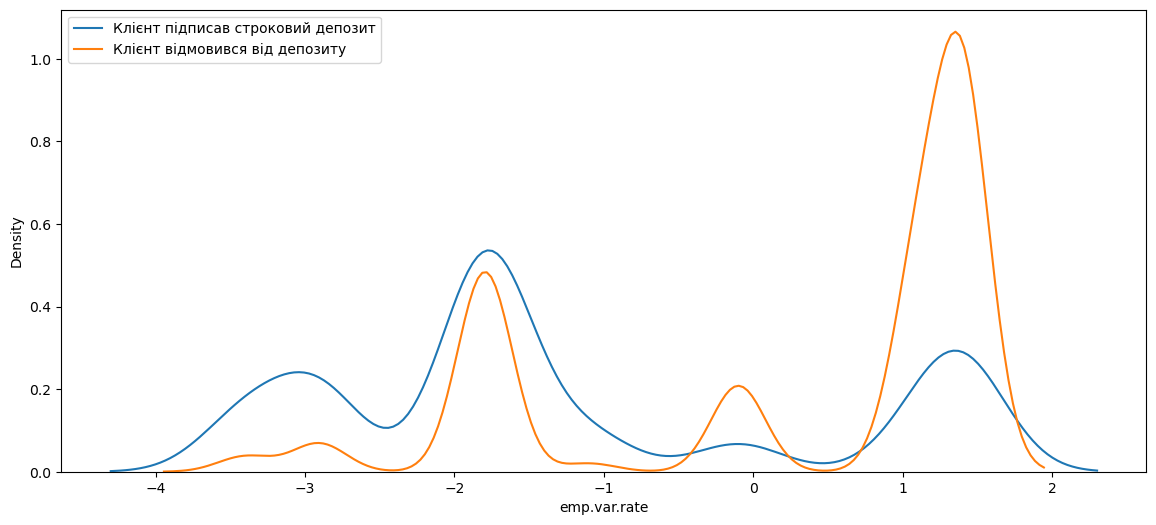

In [47]:
# Діаграми щільності розподілу для тих, хто підписав депозит, і тих, хто відмовив 
plt.figure(figsize = (14,6))
sns.kdeplot(df1['emp.var.rate'],label = 'Клієнт підписав строковий депозит')
sns.kdeplot(df0['emp.var.rate'],label = 'Клієнт відмовився від депозиту')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show()    

**Спостереження**:
- Для тих, хто підписав строковий депозит, ймовірність потрапити у діапазон від’ємних значень змінної `emp.var.rate` вища ймовірності потрапити у цей діапазон тих, хто відмовив.
- Натомість для тих, хто відмовився від депозиту, ймовірність потрапити у діапазон значень змінної `emp.var.rate`, які близькі до нуля чи додатні,  вища ймовірності потрапити у цей діапазон тих, хто підписав депозит.

### Аналіз стовпця `cons.price.idx`

In [48]:
# Статистичний звіт для стовпця
df['cons.price.idx'].describe()

count   41188.00
mean       93.58
std         0.58
min        92.20
25%        93.08
50%        93.75
75%        93.99
max        94.77
Name: cons.price.idx, dtype: float64

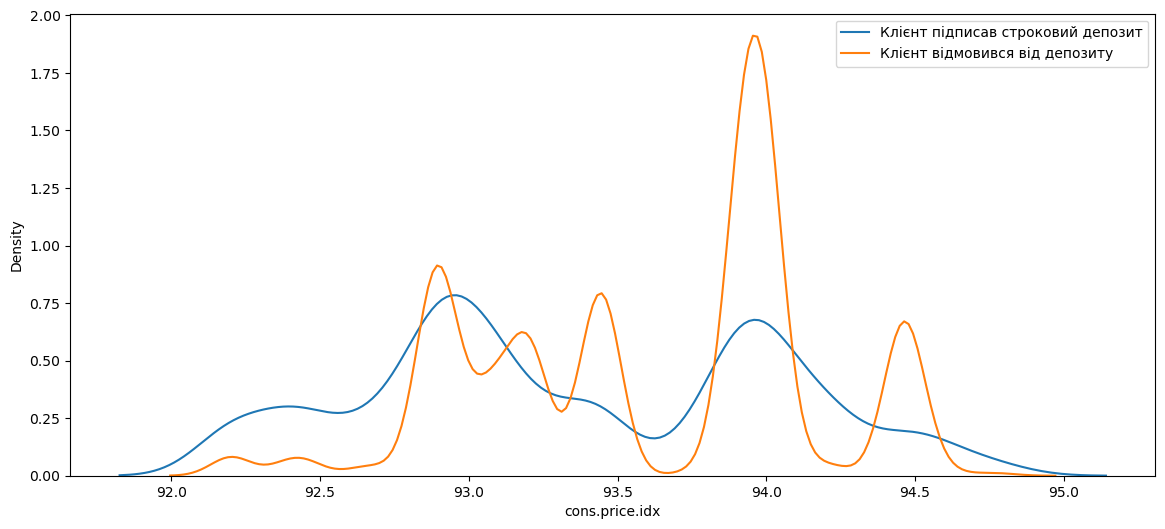

In [49]:
# Діаграми щільності розподілу для тих, хто підписав депозит, і тих, хто відмовив 
plt.figure(figsize = (14,6))
sns.kdeplot(df1['cons.price.idx'],label = 'Клієнт підписав строковий депозит')
sns.kdeplot(df0['cons.price.idx'],label = 'Клієнт відмовився від депозиту')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show() 

**Спостереження**:
- Для тих, хто відмовився від депозиту, ймовірність потрапити у період коли значення індексу споживчих цін було близко 94,0, вище ймовірності потрапити у цей період тим, хто підписав депозит.

### Аналіз стовпця `cons.conf.idx`

In [50]:
# Статистичний звіт для стовпця
df['cons.conf.idx'].describe()

count   41188.00
mean      -40.50
std         4.63
min       -50.80
25%       -42.70
50%       -41.80
75%       -36.40
max       -26.90
Name: cons.conf.idx, dtype: float64

In [51]:
df1['cons.conf.idx'].mean()

-39.78978448275862

In [52]:
df0['cons.conf.idx'].mean()

-40.59309674948014

**Спостереження**:
- Індекс довіри споживачів змінювався від -50,80 до -26,90.
- Для датафрейму всіх тих, хто підписали строковий депозит, медіана індексу довіри споживачів була дещо вища (-39,79) в порівнянні з медіаною індексу довіри споживачів датафрейму всіх тих, хто відмовився віж депозиту (-40,59). 

### Аналіз стовпця `euribor3m`

In [53]:
# Статистичний звіт для стовпця
df['euribor3m'].describe()

count   41188.00
mean        3.62
std         1.73
min         0.63
25%         1.34
50%         4.86
75%         4.96
max         5.04
Name: euribor3m, dtype: float64

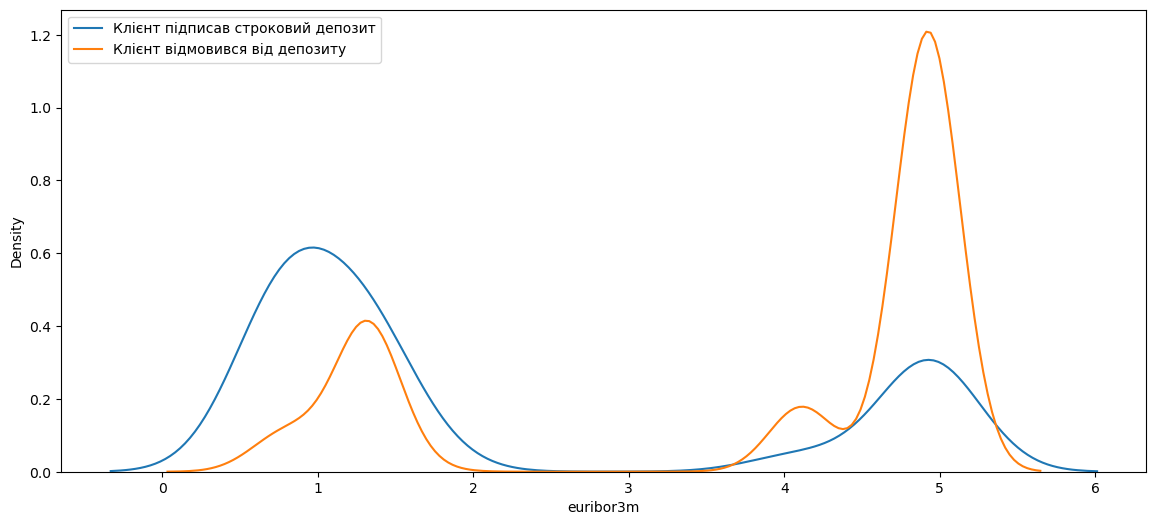

In [54]:
# Діаграми щільності розподілу для тих, хто підписав депозит, і тих, хто відмовив 
plt.figure(figsize = (14,6))
sns.kdeplot(df1['euribor3m'],label = 'Клієнт підписав строковий депозит')
sns.kdeplot(df0['euribor3m'],label = 'Клієнт відмовився від депозиту')
plt.ticklabel_format(style='plain', axis='x')
plt.legend()
plt.show() 

**Спостереження**:
- Ставка Euribor змінювалась від 0,63 до 5,04.
- Для тих, хто підписав депозит, більшою є ймовірність потрапити у діапазон, коли ставка була меншою 2.
- Натомість, для тих, хто відмовився від депозиту, більшою є ймовірність потрапити у діапазон, коли ставка була вище 3.  

### Аналіз стовпця `nr.employed`

In [55]:
# Статистичний звіт для стовпця
df['nr.employed'].describe()

count   41188.00
mean     5167.04
std        72.25
min      4963.60
25%      5099.10
50%      5191.00
75%      5228.10
max      5228.10
Name: nr.employed, dtype: float64

Перевіримо чи відрізняються діаграми розмаху по кількості працевлаштованих осіб для тих, хто підписав депозит, і тих, хто відмовив.

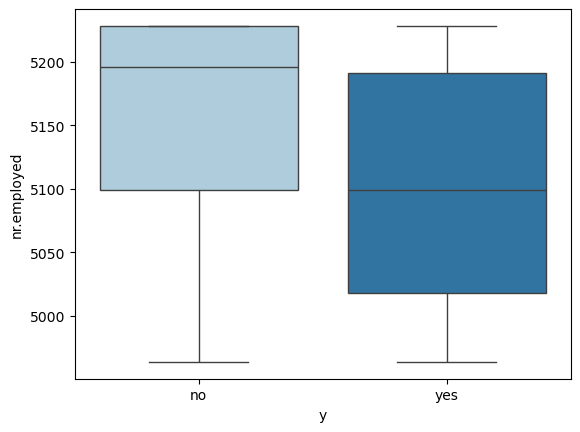

In [56]:
sns.boxplot(data=df, x="y", y="nr.employed", hue = 'y', palette = "Paired")
plt.show()

**Спостереження**:
- Кількість працевлаштованих осіб за період спостереження змінювалась від 4963 до 5228.
- Боксплоти для тих, хто підписав депозит, і хто відмовив, достатньо відрізняються. Для датафрейму всіх тих, хто відмовився від депозиту, медіана кількості працевлаштованих осіб у час, який припав на відмову, значно вища за медіану кількості працевлаштованих осіб датафрейму всіх тих, хто підписав депозит.
- Вищий рівень безробіття (меншої кількості працевлавштованих) може позитивно впливати на готовність людей підписувати строкові депозити і отримувати додаткову готівку.

## Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків, коли депозит було підписано

In [57]:
corr_df1 = df1.select_dtypes(include='number').corr()
corr_df1

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.00,-0.06,-0.01,-0.06,0.07,-0.08,-0.02,0.14,-0.09,-0.11
duration,-0.06,1.00,0.16,0.24,-0.23,0.50,0.24,-0.14,0.50,0.48
campaign,-0.01,0.16,1.00,0.11,-0.10,0.22,0.12,-0.04,0.21,0.20
pdays,-0.06,0.24,0.11,1.00,-0.73,0.28,-0.06,-0.17,0.36,0.45
previous,0.07,-0.23,-0.10,-0.73,1.00,-0.28,0.09,0.13,-0.39,-0.49
emp.var.rate,-0.08,0.50,0.22,0.28,-0.28,1.00,0.66,-0.27,0.93,0.79
cons.price.idx,-0.02,0.24,0.12,-0.06,0.09,0.66,1.00,-0.33,0.41,0.12
cons.conf.idx,0.14,-0.14,-0.04,-0.17,0.13,-0.27,-0.33,1.00,-0.12,-0.20
euribor3m,-0.09,0.50,0.21,0.36,-0.39,0.93,0.41,-0.12,1.00,0.92
nr.employed,-0.11,0.48,0.20,0.45,-0.49,0.79,0.12,-0.20,0.92,1.00


Створимо теплову карту для перегляду позитивних кореляцій вище 70% і 99,99%

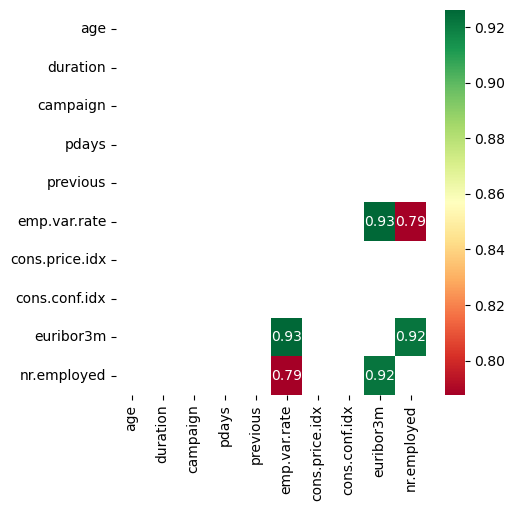

In [58]:
plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.7) & (corr_df1 < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [59]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(20)

euribor3m       emp.var.rate     0.93
emp.var.rate    euribor3m        0.93
euribor3m       nr.employed      0.92
nr.employed     euribor3m        0.92
                emp.var.rate     0.79
emp.var.rate    nr.employed      0.79
cons.price.idx  emp.var.rate     0.66
emp.var.rate    cons.price.idx   0.66
duration        emp.var.rate     0.50
emp.var.rate    duration         0.50
duration        euribor3m        0.50
euribor3m       duration         0.50
nr.employed     duration         0.48
duration        nr.employed      0.48
nr.employed     pdays            0.45
pdays           nr.employed      0.45
euribor3m       cons.price.idx   0.41
cons.price.idx  euribor3m        0.41
euribor3m       pdays            0.36
pdays           euribor3m        0.36
dtype: float64

**Спостереження**: найкращі кореляції спостерігаються між атрибутами соціально-економічного контексту.
- euribor3m - emp.var.rate 0.93
- euribor3m - nr.employed 0.92
- emp.var.rate - nr.employed 0.79
- emp.var.rate - cons.price.idx 0.66

### Побудова кореляційної матриці для випадків, коли депозит не було підписано

In [60]:
corr_df0 = df0.select_dtypes(include='number').corr()
corr_df0

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.00,0.00,0.01,-0.01,-0.00,0.03,0.01,0.12,0.04,0.02
duration,0.00,1.00,-0.08,-0.01,-0.00,0.00,0.02,0.00,0.01,-0.00
campaign,0.01,-0.08,1.00,0.03,-0.07,0.13,0.12,-0.01,0.12,0.13
pdays,-0.01,-0.01,0.03,1.00,-0.43,0.19,0.09,-0.03,0.20,0.24
previous,-0.00,-0.00,-0.07,-0.43,1.00,-0.42,-0.27,-0.14,-0.44,-0.46
emp.var.rate,0.03,0.00,0.13,0.19,-0.42,1.00,0.80,0.32,0.98,0.92
cons.price.idx,0.01,0.02,0.12,0.09,-0.27,0.80,1.00,0.15,0.73,0.59
cons.conf.idx,0.12,0.00,-0.01,-0.03,-0.14,0.32,0.15,1.00,0.39,0.21
euribor3m,0.04,0.01,0.12,0.20,-0.44,0.98,0.73,0.39,1.00,0.95
nr.employed,0.02,-0.00,0.13,0.24,-0.46,0.92,0.59,0.21,0.95,1.00


Створимо теплову карту для перегляду позитивних кореляцій вище 70% і 99,99%

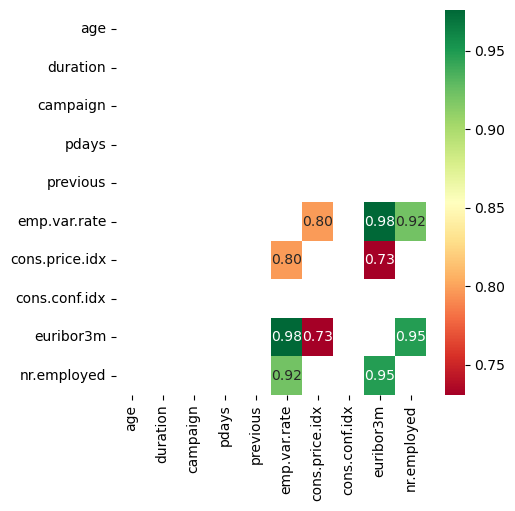

In [61]:
plt.figure(figsize = (5,5))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.7) & (corr_df0 < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [62]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(20)

emp.var.rate    euribor3m        0.98
euribor3m       emp.var.rate     0.98
nr.employed     euribor3m        0.95
euribor3m       nr.employed      0.95
emp.var.rate    nr.employed      0.92
nr.employed     emp.var.rate     0.92
cons.price.idx  emp.var.rate     0.80
emp.var.rate    cons.price.idx   0.80
cons.price.idx  euribor3m        0.73
euribor3m       cons.price.idx   0.73
nr.employed     cons.price.idx   0.59
cons.price.idx  nr.employed      0.59
euribor3m       cons.conf.idx    0.39
cons.conf.idx   euribor3m        0.39
emp.var.rate    cons.conf.idx    0.32
cons.conf.idx   emp.var.rate     0.32
nr.employed     pdays            0.24
pdays           nr.employed      0.24
cons.conf.idx   nr.employed      0.21
nr.employed     cons.conf.idx    0.21
dtype: float64

**Спостереження**: найкращі кореляції так само спостерігаються між атрибутами соціально-економічного контексту.
- euribor3m - emp.var.rate 0.98
- euribor3m - nr.employed 0.95
- emp.var.rate - nr.employed 0.92
- emp.var.rate - cons.price.idx 0.80

**Порівняння найкращих кореляцій**:
- Топ-4 кореляцій для випадків підписання депозиту і відмови однакові, за винятком відмінностей у відсотках кореляції (у випадках непідписання депозиту кореляції вищі).
- Найвища кореляція для комбінації `euribor3m` та `emp.var.rate`.
- Для набору даних "Депозит підписано" кореляція між `euribor3m` та `emp.var.rate` становить 0,93.
- Для набору даних "Депозит не підписано" кореляція між `euribor3m` та `emp.var.rate` становить 0,98.

## Робота з категоріальними змінними

In [63]:
# Перелік категоріальних змінних
df.select_dtypes(include = "object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [64]:
# Кількість категоріальних змінних
len(df.select_dtypes(include = "object").columns)

11

### Аналіз стовпця 'job'

In [65]:
# Кількість унікальних значень стовпця
df['job'].nunique()

12

In [66]:
# Кількісний і відсотковий розподіл унікальних значень стовпця 
job_count_percentage_df = pd.DataFrame({'count': df['job'].value_counts(),'percentage': df['job'].value_counts(normalize = True) * 100})
job_count_percentage_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
job,,
admin.,10422,25.30
blue-collar,9254,22.47
technician,6743,16.37
services,3969,9.64
management,2924,7.10
retired,1720,4.18
entrepreneur,1456,3.54
self-employed,1421,3.45
housemaid,1060,2.57


**Спостереження**:
- Категоріальний стовпець `job` містить 12 унікальних значень.
- Майже половина клієнтів мають вид зайнятості `admin.` або `blue-collar` (25,30% + 22,47% = 47,77%).
- Є 330 записів з невідомим видом зайнятості клієнта. Це складає 0,8% від загальної кількості клієнтів, що не так багато. Чіткої моди немає. Тому ці дані краще залишити як є, не проводячи імпутації.

**Одномірний аналіз стовпця (категоріальний vs цільовий)**

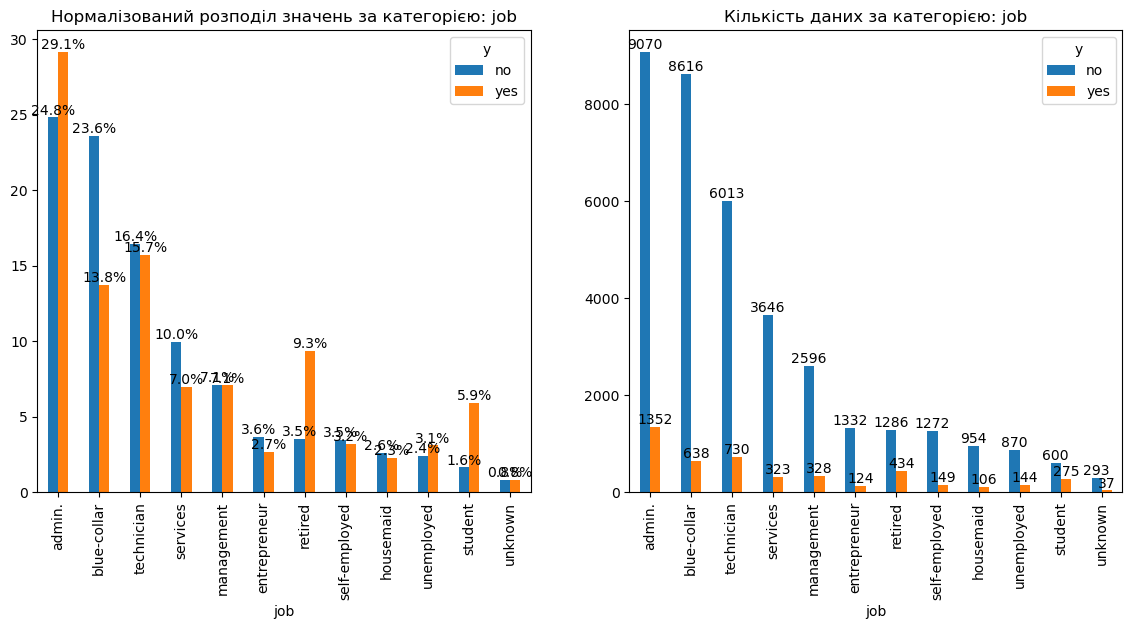

In [67]:
uni_cat_target_compare(df, 'job')

**Спостереження**:
- Судячи з діаграм, загалом суттєвих відмінностей у `job` між клієнтами, які підписали депозит і тими, які відмовились, для більшості категорій немає.
- Але помітним є, що серед клієнтів, які підписали депозит, 9,3% складають пенсіонери (`retired`) і 5,9% студенти (`student`). В той час як для клієнтів, що відмовились від депозиту, вказані категорії складають лише 3,5% і 1,6% відповідно. Це співпадає з висновками, зробленими вище щодо числової змінної `age`: для категорії клієнтів до 30 років (більшість студентів якраз серед них) і категорії клієнтів віку 60+ строкові депозити є більш привабливими, ніж для людей середнього віку.

Перевіримо усі категоріальні стовпці на наявність значень `unknown` і їх відсоток.

In [68]:
unknown_count = df.select_dtypes(include = "object").isin(['unknown']).sum()
unknown_percentage = round((df.select_dtypes(include = "object").isin(['unknown']).sum()/df.shape[0])*100, 2)

In [69]:
unknown_df = pd.DataFrame({'count': unknown_count,'percentage': unknown_percentage})
unknown_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
default,8597,20.87
education,1731,4.20
housing,990,2.40
loan,990,2.40
job,330,0.80
marital,80,0.19
contact,0,0.00
month,0,0.00
day_of_week,0,0.00
poutcome,0,0.00


**Спостереження**:
- Шість категоріальних стовпців містять значення `unknown`.
- Один з них, стовпець `default`, має досить значний відсоток значень `unknown`, майже 21%.

### Аналіз стовпця 'default'

In [70]:
# Кількість унікальних значень стовпця
df['default'].nunique()

3

In [71]:
# Кількісний і відсотковий розподіл унікальних значень стовпця 
default_count_percentage_df = pd.DataFrame({'count': df['default'].value_counts(),'percentage': df['default'].value_counts(normalize = True) * 100})
default_count_percentage_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
default,,
no,32588,79.12
unknown,8597,20.87
yes,3,0.01


Відсоток невідомих значень більший за 10, але є чітко виражена мода, значення `no`, тому значення `unknown` в межах препроцесингу пізніше можемо замінити нею. І додати стовпець, в якому буде позначено де були невідомі значення - це буде додаткова ознака для моделі. Або залишити як є.

### Аналіз стовпця 'education'

In [72]:
# Кількість унікальних значень стовпця
df['education'].nunique()

8

In [73]:
# Кількісний і відсотковий розподіл унікальних значень стовпця 
education_count_percentage_df = pd.DataFrame({'count': df['education'].value_counts(),'percentage': df['education'].value_counts(normalize = True) * 100})
education_count_percentage_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
education,,
university.degree,12168,29.54
high.school,9515,23.10
basic.9y,6045,14.68
professional.course,5243,12.73
basic.4y,4176,10.14
basic.6y,2292,5.56
unknown,1731,4.20
illiterate,18,0.04


**Спостереження**:
- Категоріальний стовпець `education` містить 8 унікальних значень.
- Більше половини клієнтів мають вищу або повну середню освіту (29,54% + 23,10% = 52,64%).
- Є 1731 запис з невідомою освітою клієнта. Це складає 4,20% від загальної кількості клієнтів. Чітко вираженої моде немає, тому ці дані краще залишити як є, не проводячи імпутації.

**Одномірний аналіз стовпця (категоріальний vs цільовий)**

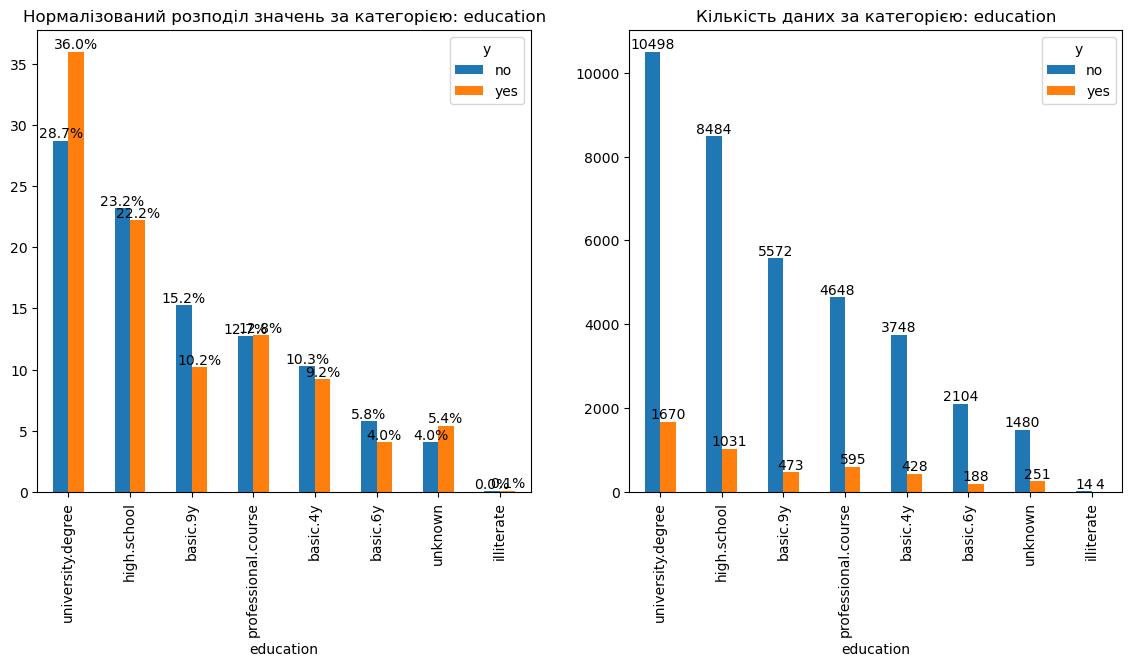

In [74]:
uni_cat_target_compare(df, 'education')

**Спостереження**:
дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `education` між клієнтами, які підписали депозит, і тими, що відмовились. Тому цей стовпець не надає жодних переконливих доказів на користь клієнтів, які підписують депозит АБО відмовляються.

### Аналіз стовпця 'housing'

In [75]:
# Кількість унікальних значень стовпця
df['housing'].nunique()

3

In [76]:
# Кількісний і відсотковий розподіл унікальних значень стовпця 
housing_count_percentage_df = pd.DataFrame({'count': df['housing'].value_counts(),'percentage': df['housing'].value_counts(normalize = True) * 100})
housing_count_percentage_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
housing,,
yes,21576,52.38
no,18622,45.21
unknown,990,2.40


**Спостереження**:
- Категоріальний стовпець `housing` містить 3 унікальних значення.
- Є 990 записів з невідомою значенням категорії. Це складає 2,40% від загальної кількості клієнтів. Чітко вираженої моде немає, тому ці дані краще залишити як є, не проводячи заміни невідомих значень.

**Одномірний аналіз стовпця (категоріальний vs цільовий)**

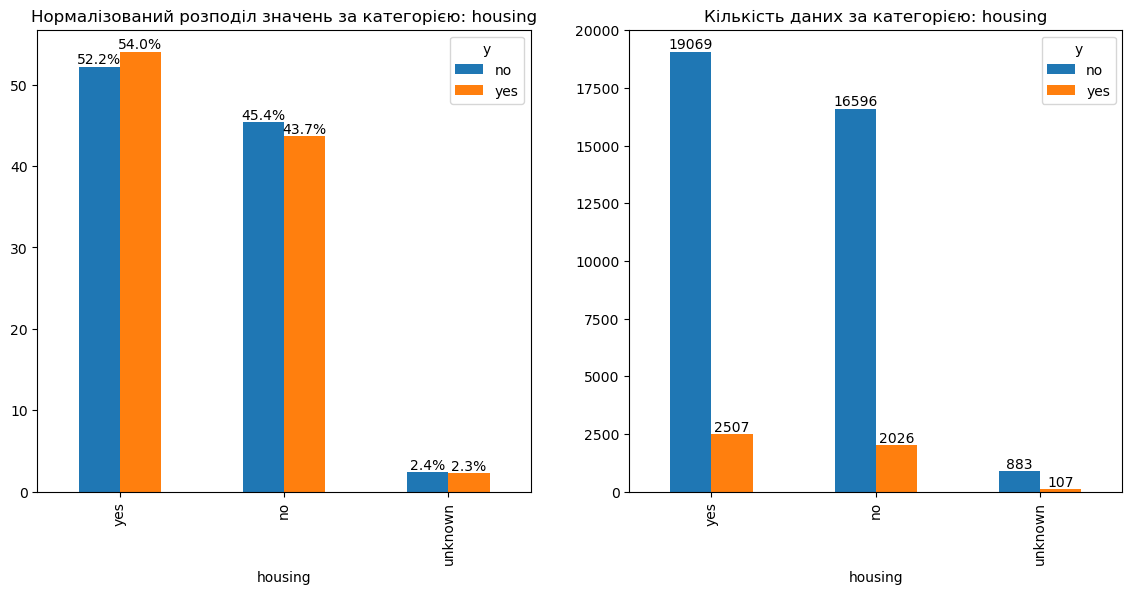

In [77]:
uni_cat_target_compare(df, 'housing')

**Спостереження**:
дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `housing` між клієнтами, які підписали депозит, і тими, що відмовились. Тому цей стовпець не надає жодних переконливих доказів на користь клієнтів, які підписують депозит АБО відмовляються.

### Аналіз стовпця 'loan'

In [78]:
# Кількість унікальних значень стовпця
df['loan'].nunique()

3

In [79]:
# Кількісний і відсотковий розподіл унікальних значень стовпця 
loan_count_percentage_df = pd.DataFrame({'count': df['loan'].value_counts(),'percentage': df['loan'].value_counts(normalize = True) * 100})
loan_count_percentage_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
loan,,
no,33950,82.43
yes,6248,15.17
unknown,990,2.40


**Спостереження**:
- Категоріальний стовпець `loan` містить 3 унікальних значення.
- Є 990 записів з невідомою значенням категорії. Це складає 2,40% від загальної кількості клієнтів. Є чітко виражена мода, тому невідомі значення можна замінити нею в рамках препроцесингу. І додати стовпець з відміткою які дані були замінені. Він буде додатковою ознакою для моделі.

**Одномірний аналіз стовпця (категоріальний vs цільовий)**

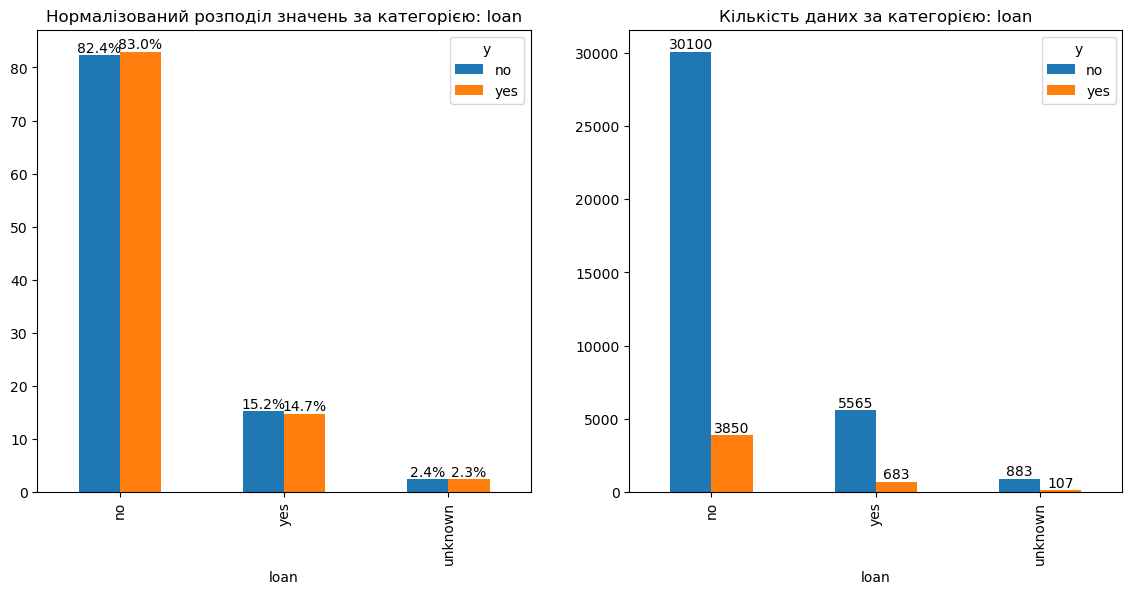

In [80]:
uni_cat_target_compare(df, 'loan')

**Спостереження**:
дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `loan` між клієнтами, які підписали депозит, і тими, що відмовились. Тому цей стовпець не надає жодних переконливих доказів на користь клієнтів, які підписують депозит АБО відмовляються.

### Аналіз стовпця 'marital'

In [81]:
# Кількість унікальних значень стовпця
df['marital'].nunique()

4

In [82]:
# Кількісний і відсотковий розподіл унікальних значень стовпця 
marital_count_percentage_df = pd.DataFrame({'count': df['marital'].value_counts(),'percentage': df['marital'].value_counts(normalize = True) * 100})
marital_count_percentage_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
marital,,
married,24928,60.52
single,11568,28.09
divorced,4612,11.20
unknown,80,0.19


**Спостереження**:
- Категоріальний стовпець `marital` містить 4 унікальних значення.
- Є 80 записів з невідомим сімейним статусом клієнта. Це складає всього 0,19% від загальної кількості клієнтів. Ми можемо просто видалити ці рядки. Але, щоб максимально зберегти дані, а також оскільки добре виражене найбільш частотне значення 'married' (мода), яке складає 60,52% від загальної кількості клієнтів, то замінимо пізніше в рамках препроцесингу невідомі значення ним. Така заміна не призведе до зміщення, так як невідомих даних дуже мало.

Решта категоріальних стовпців не мають невідомих значень.\
Тому просто перевіримо розподіл унікальних значень в них.

**Одномірний аналіз стовпця (категоріальний vs цільовий)**

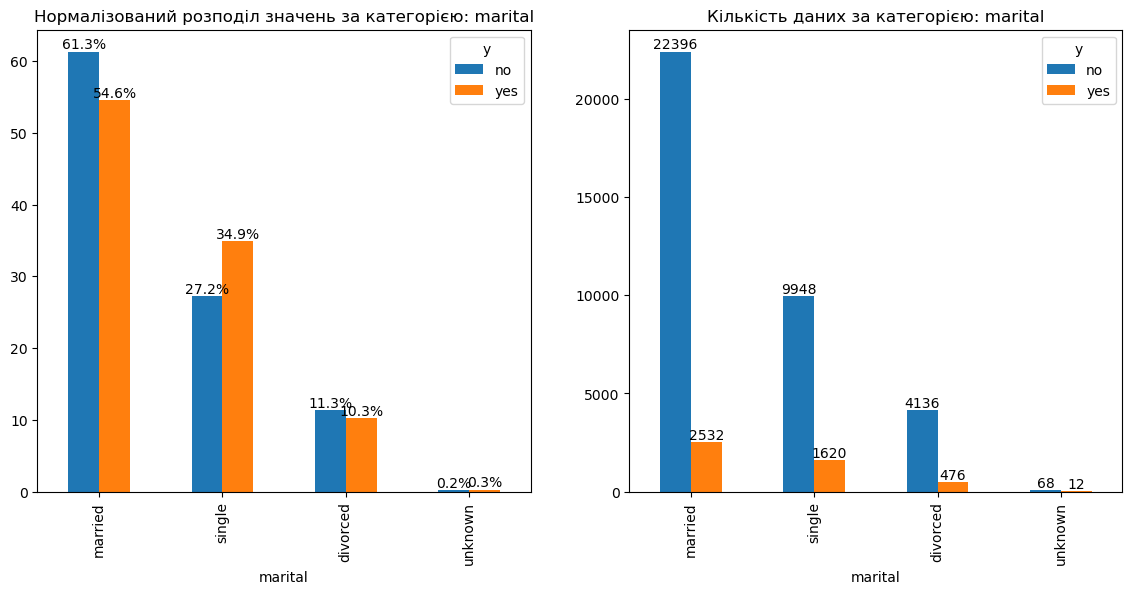

In [83]:
uni_cat_target_compare(df, 'marital')

**Спостереження**:
дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `marital` між клієнтами, які підписали депозит, і тими, що відмовились. Тому цей стовпець не надає жодних переконливих доказів на користь клієнтів, які підписують депозит АБО відмовляються.

### Аналіз стовпця 'contact'

In [84]:
# Кількість унікальних значень стовпця
df['contact'].nunique()

2

In [85]:
df['contact']. value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

**Спостереження**:
- В більшості випадків останній контакт з клієнтом мав тип зв’язку 'cellular'

**Одномірний аналіз стовпця (категоріальний vs цільовий)**

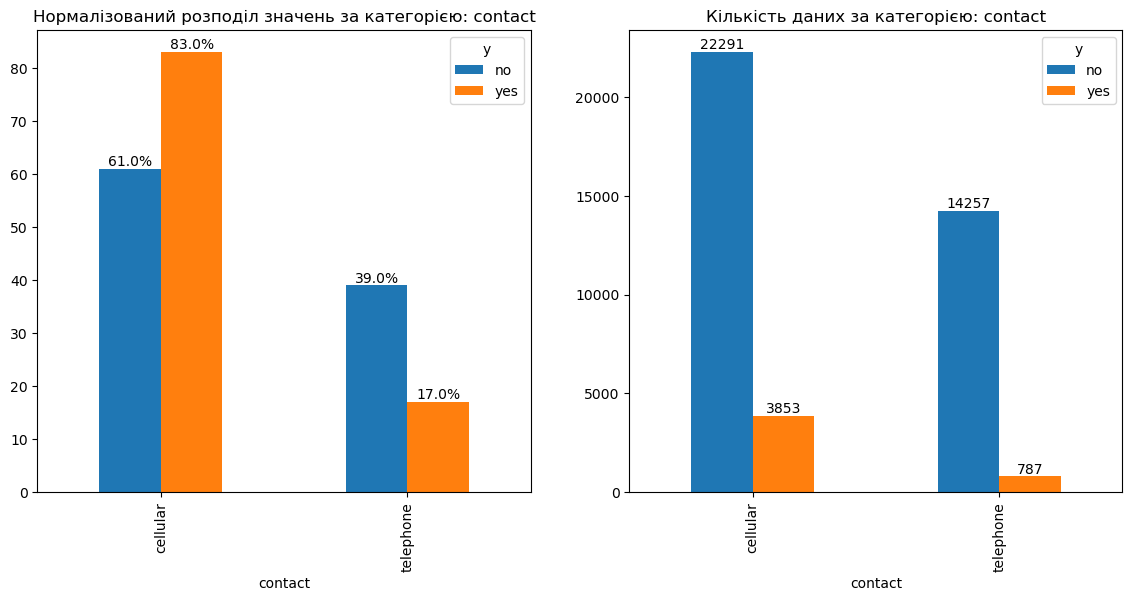

In [86]:
uni_cat_target_compare(df, 'contact')

**Спостереження**:
дивлячись на гістограми, бачимо відмінності у `contact` між клієнтами, які підписали депозит, і тими, що відмовились. Серед тих, хто підписав депозит, з 83% клієнтів контакт був типу `cellular`, серед тих, хто відмовив, такий тип контакту був лише з 61% клієнтів. Але навіть при цьому стовпець не надає жодних переконливих доказів на користь клієнтів, які підписують депозит АБО відмовляються.

### Аналіз стовпця 'poutcome'

In [87]:
# Кількість унікальних значень стовпця
df['poutcome'].nunique()

3

In [88]:
# Кількісний і відсотковий розподіл унікальних значень стовпця 
poutcome_count_percentage_df = pd.DataFrame({'count': df['poutcome'].value_counts(),'percentage': df['poutcome'].value_counts(normalize = True) * 100})
poutcome_count_percentage_df.sort_values(by = 'percentage', ascending = False)

,count,percentage
poutcome,,
nonexistent,35563,86.34
failure,4252,10.32
success,1373,3.33


**Спостереження**:
- В переважній більшості випадків (86,34%) результат попередньої маркетингової кампанії відмічений як 'nonexistent' (= неіснуючий). Це, очевидно, через те, що, як було досліджено вище, з більшістю клієнтів не було контактів взагалі до поточної кампанії.

**Одномірний аналіз стовпця (категоріальний vs цільовий)**

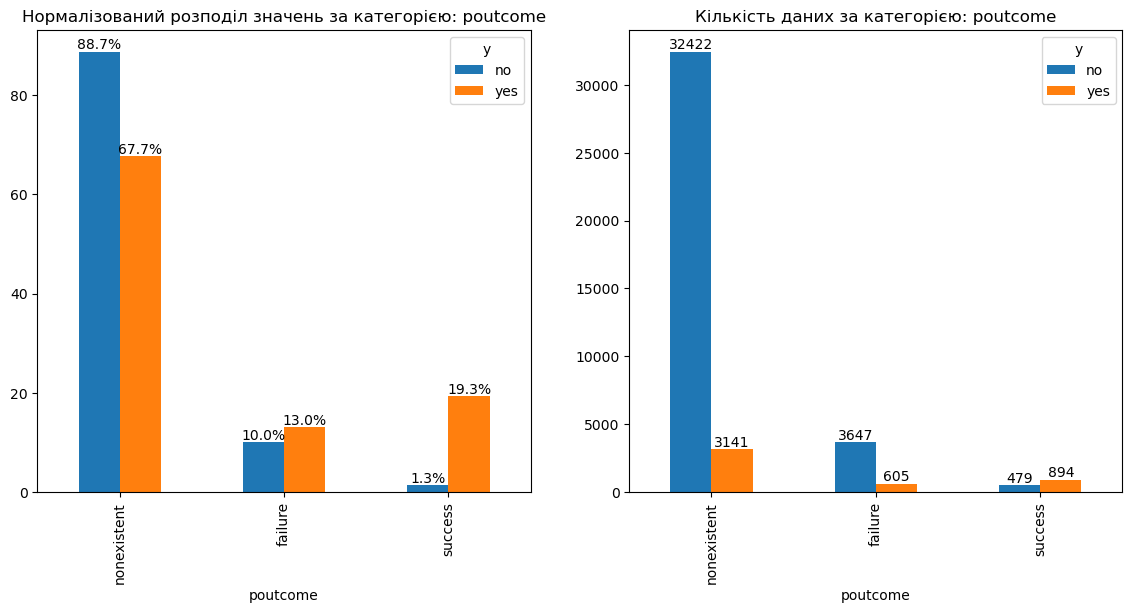

In [89]:
uni_cat_target_compare(df, 'poutcome')

**Спостереження**:
- Судячи з гістограми, з тих клієнтів, які підписали депозит у поточній кампанії, для 19,3% попередня кампанія теж була успішна. Крім того, 13,0% тих, які у поточній кампанії підписали депозит, у попередній відмовили.
- Для тих клієнтів, які відмовились від депозиту у поточній кампанії, ситуація інша. Лише для 1,3% з них був успіх у попередній кампанії.
- Можна стверджувати, що успіх у попередній кампанії (чи хоча б контакт в межах неї, як було показано вище при аналізі стовпця `pdays`) підвищує шанс на успіх в поточній кампанії.

## Exploratory Data Analysis. Висновки

- Для клієнта, який підписав депозит, ймовірність потрапити у діапазон 30-60 років, менша, ніж ймовірність потрапити у цей діапазон клієнту, який не підписав.
- Натомість, для клієнта, який підписав депозит, ймовірність потрапити у діапазон до 30 років чи після 60 років, більша, ніж ймовірність потрапити у цей діапазон клієнту, який не підписав.
- Враховуючи описані в попередніх двох пунктах спостереження, змінна `age` виглядає такою, що має вплив на цільову змінну.
- Медіана тривалості розмови з тими, хто підписав депозит, значно вища медіани тривалості розмови з тими, хто відмовив. Тому змінна `duration` є хорошим показником для визначення підпише клієнт депозит чи ні, і має суттєвий вплив на цільову змінну.
- Ті клієнти, з ким був контакт в попередній кампанії, більш охоче підписують депозит у поточній. І змінна `pdays` тому є хорошим показником для оцінки того, підпише клієнт депозит чи ні. Але в рамках препроцесингу, оскільки частка тих, з ким в попередній кампанії контактували, дуже незначна (<4%), може бути доречним не розглядати кількість днів з моменту останнього контакту в попередній кампанії, а розділити всіх клієнтів на тих, з ким в попередній кампанії контакт був (значення стовпця !=999), і тих, з ким такого контакту не було (значення стовпця =999).
- Клієнти, з якими до поточної кампанії був хоч один контакт, більше схильні підписати депозит. Тому змінна `previous` виглядає хорошим показником для оцінки того, підпише клієнт депозит чи ні.
- Для тих, хто підписав строковий депозит, ймовірність потрапити у діапазон від’ємних значень змінної `emp.var.rate` (темп зміни зайнятості) вища ймовірності потрапити у цей діапазон тих, хто відмовив. Натомість для тих, хто відмовився від депозиту, ймовірність потрапити у діапазон значень змінної `emp.var.rate`, які близькі до нуля чи додатні, вища ймовірності потрапити у цей діапазон тих, хто підписав депозит. Тому ця змінна теж може мати свій вплив на цільовий показник.
- Для тих, хто підписав депозит, більшою є ймовірність потрапити у діапазон, коли ставка `Euribor` була меншою 2. Натомість, для тих, хто відмовився від депозиту, більшою є ймовірність потрапити у діапазон, коли ця ставка була вище 3.
- Для датафрейму всіх тих, хто відмовився від депозиту, медіана кількості працевлаштованих осіб у час, який припав на відмову, значно вища за медіану кількості працевлаштованих осіб датафрейму всіх тих, хто підписав депозит. Звідси, вищий рівень безробіття (меншої кількості працевлавштованих) може позитивно впливати на готовність людей підписувати строкові депозити і отримувати додаткову готівку. Тому показник `nr.employed` може мати свій вплив на цільову змінну.
- Успіх у попередній кампанії, змінна `poutcome`, (чи хоча б контакт в межах неї, як було зазначено вище для змінної `pdays`) підвищує шанс на успіх в поточній кампанії.
- Решта змінних не надають якихось переконливих доказів на користь клієнтів, які підписують депозит чи відмовляються від нього.

**Оскільки дана задача є задачею класифікації, то для її розв’язання доцільно використати відповідні алгоритми: логістичну регресію, дерева прийняття рішень, kNN, XGBoost, LightGBM. Так як у нас немає вказаного порогу, а значить ми не зможемо використати f1, тому у якості метрики будемо брати AUROC.** 

# Препроцесинг

In [90]:
# Заміна значень `yes`, `no` цільового стовпця на більш зручні 1,0.

df['y'] = np.where(df['y'] == 'yes', 1, 0)

In [91]:
# Розбиття на навчальну і валідаціну вибірки, застосовуючи стратифікацію для рівномірного розбиття за мітками класів

train_df, val_df = train_test_split(df, test_size = 0.25, random_state = 42, stratify = df.y)

In [92]:
# Перевірка розмірів тренувального і валідаційного наборів

print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)

train_df.shape: (30891, 21)
val_df.shape: (10297, 21)


In [93]:
# Створення списку вхідних стовпців і визначення цільового стовпця

input_cols = list(train_df.columns)[:-1]
target_col = list(train_df.columns)[-1]

In [94]:
# Створення наборів даних train_inputs, train_targets, val_inputs, val_targets

train_inputs = train_df[input_cols]
train_targets = train_df[target_col]

val_inputs = val_df[input_cols]
val_targets = val_df[target_col]

### Заміна невідомих значень деяких категоріальних стовпців, створення додаткових ознак, видалення зайвих

На основі значень стовпця `pdays` (кількість днів, що минули з моменту останнього контакту клієнта у попередній кампанії), створимо новий стовпець `prev_camp_contact_flag`, який фіксуватиме чи був з клієнтом в попередній кампанії контакт взагалі: якщо значення стовпця `pdays` не дорівнює 999, значить контакт був, інакше – ні. 

In [95]:
# Додання нової ознаки у тренувальний і валідаційнмй набори

train_inputs['prev_camp_contact_flag'] =  np.where(train_inputs['pdays'] != 999, 1, 0)
val_inputs['prev_camp_contact_flag'] =  np.where(val_inputs['pdays'] != 999, 1, 0)

In [96]:
# Видалення стовпця `pdays` з тренувального і валідаційного наборів

train_inputs.drop('pdays', axis = 1, inplace = True)
val_inputs.drop('pdays', axis = 1, inplace = True)

Заміна у стовпці `loan` невідомого значення найбільш частотним значенням `no`:

In [97]:
# Додавання стовпця з позначкою де були невідомі значення у стовпці 'loan'

train_inputs['loan_unknown_flag'] = np.where(train_inputs['loan'] == 'unknown', 1, 0)
val_inputs['loan_unknown_flag'] = np.where(val_inputs['loan'] == 'unknown', 1, 0)

In [98]:
# Заміна у стовпці 'loan' невідомих значень модою 'no'

train_inputs['loan'] = np.where(train_inputs['loan'] == 'unknown', 'no', train_inputs['loan'])
val_inputs['loan'] = np.where(val_inputs['loan'] == 'unknown', 'no', val_inputs['loan'])

Заміна у стовпці `marital` невідомого значення найбільш частотним значенням `married`:

In [99]:
# Додавання стовпця з позначкою де були невідомі значення у стовпці 'marital'

train_inputs['marital_unknown_flag'] = np.where(train_inputs['marital'] == 'unknown', 1, 0)
val_inputs['marital_unknown_flag'] = np.where(val_inputs['marital'] == 'unknown', 1, 0)

In [100]:
# Заміна у стовпці 'marital' невідомих значень модою 'married'

train_inputs['marital'] = np.where(train_inputs['marital'] == 'unknown', 'married', train_inputs['marital'])
val_inputs['marital'] = np.where(val_inputs['marital'] == 'unknown', 'married', val_inputs['marital'])

Оскільки змінна `duration` (тривалість останнього контакту в секундах) має суттєвий вплив на цільову змінну, але її значення невідоме до здійснення дзвінка (а після завершення дзвінка значення `y` вже відоме), тому цю змінну не будемо включати у передбачувальну модель, щоб вона була більш реалістичною і можна було перевірити наскільки добре вона працює без цієї інформації.

In [101]:
# Видалення стовпця `duration` з тренувального і валідаційного наборів

train_inputs.drop('duration', axis = 1, inplace = True)
val_inputs.drop('duration', axis = 1, inplace = True)

In [102]:
# Визначення числових стовпців

numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
print('Числові стовпці:', numeric_cols)

Числові стовпці: ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'prev_camp_contact_flag', 'loan_unknown_flag', 'marital_unknown_flag']


In [103]:
# Визначення категоріальних стовпців

categorical_cols = train_inputs.select_dtypes(include = 'object').columns.tolist()
print('Категоріальні стовпці:', categorical_cols)

Категоріальні стовпці: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [104]:
# Створення копій наборів train_inputs, val_inputs, в яких стовпці пізніше будуть масштабуватись і кодуватись, якщо потрібно

train_inputs_copy = train_inputs.copy()
val_inputs_copy = val_inputs.copy()

### Масштабування числових ознак

In [105]:
# Статистичний звіт для числових змінних
train_inputs_copy[numeric_cols].describe()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prev_camp_contact_flag,loan_unknown_flag,marital_unknown_flag
count,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00
mean,40.01,2.56,0.18,0.08,93.58,-40.51,3.62,5166.86,0.04,0.02,0.00
std,10.40,2.75,0.50,1.57,0.58,4.63,1.74,72.45,0.19,0.15,0.04
min,17.00,1.00,0.00,-3.40,92.20,-50.80,0.63,4963.60,0.00,0.00,0.00
25%,32.00,1.00,0.00,-1.80,93.08,-42.70,1.34,5099.10,0.00,0.00,0.00
50%,38.00,2.00,0.00,1.10,93.75,-41.80,4.86,5191.00,0.00,0.00,0.00
75%,47.00,3.00,0.00,1.40,93.99,-36.40,4.96,5228.10,0.00,0.00,0.00
max,98.00,56.00,7.00,1.40,94.77,-26.90,5.04,5228.10,1.00,1.00,1.00


З вигляду даних (стовпці мають дуже різні діапазони) можна зробити висновок, що потрібне масштабування.

In [106]:
scaler = MinMaxScaler()
scaler.fit(train_inputs_copy[numeric_cols])

MinMaxScaler()

In [107]:
train_inputs_copy[numeric_cols] = scaler.transform(train_inputs_copy[numeric_cols])
val_inputs_copy[numeric_cols] = scaler.transform(val_inputs_copy[numeric_cols])

### Кодування категоріальних ознак

In [108]:
# Викликаємо OneHotEncoder
# Визначаємо список категорій в усіх категоріальних стовпцях

encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoder.fit(train_inputs_copy[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [109]:
# Генеруємо назви стовпців для кожної окремої категорії
# Додаємо закодовані стовпці до train_inputs та val_inputs

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs_copy[encoded_cols] = encoder.transform(train_inputs_copy[categorical_cols])
val_inputs_copy[encoded_cols] = encoder.transform(val_inputs_copy[categorical_cols])

**Перевірка поточного вигляду навчального і валідаційного наборів**

In [110]:
display(train_inputs_copy.head(), val_inputs_copy.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prev_camp_contact_flag,loan_unknown_flag,marital_unknown_flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
34300,0.15,services,single,high.school,no,yes,yes,cellular,may,thu,0.16,0.00,nonexistent,0.33,0.27,0.19,0.14,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
25076,0.46,management,married,university.degree,no,no,no,cellular,nov,tue,0.00,0.14,failure,0.69,0.39,0.37,0.80,0.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00
17533,0.47,self-employed,married,unknown,unknown,no,no,cellular,jul,mon,0.04,0.00,nonexistent,1.00,0.67,0.34,0.98,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
35820,0.32,blue-collar,married,unknown,unknown,no,no,cellular,may,mon,0.09,0.00,nonexistent,0.33,0.27,0.19,0.14,0.51,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1080,0.46,blue-collar,married,basic.4y,no,yes,no,telephone,may,wed,0.07,0.00,nonexistent,0.94,0.70,0.60,0.96,0.86,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prev_camp_contact_flag,loan_unknown_flag,marital_unknown_flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
31165,0.30,blue-collar,single,basic.9y,no,yes,no,cellular,may,wed,0.00,0.00,nonexistent,0.33,0.27,0.19,0.16,0.51,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
26855,0.17,services,divorced,high.school,no,yes,no,cellular,nov,thu,0.00,0.00,nonexistent,0.69,0.39,0.37,0.78,0.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
38292,0.48,admin.,married,basic.9y,no,no,no,cellular,oct,wed,0.02,0.00,nonexistent,0.00,0.09,1.00,0.02,0.20,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
8532,0.19,blue-collar,single,university.degree,no,no,no,telephone,jun,wed,0.00,0.00,nonexistent,1.00,0.88,0.38,0.96,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
25472,0.19,blue-collar,married,high.school,no,yes,no,cellular,nov,wed,0.00,0.00,nonexistent,0.69,0.39,0.37,0.79,0.88,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00


Закодовані категоріальні стовпці додані в тренувальний і валідаційний набори.

In [111]:
display(train_inputs_copy.describe().round(2), val_inputs_copy.describe().round(2))

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prev_camp_contact_flag,loan_unknown_flag,marital_unknown_flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00,30891.00
mean,0.28,0.03,0.03,0.73,0.54,0.43,0.68,0.77,0.04,0.02,0.00,0.25,0.22,0.03,0.03,0.07,0.04,0.03,0.10,0.02,0.16,0.02,0.01,0.11,0.61,0.28,0.10,0.06,0.15,0.23,0.00,0.13,0.30,0.04,0.79,0.21,0.00,0.45,0.02,0.52,0.85,0.15,0.64,0.36,0.06,0.15,0.00,0.18,0.13,0.01,0.33,0.10,0.02,0.01,0.19,0.21,0.21,0.20,0.20,0.10,0.86,0.03
std,0.13,0.05,0.07,0.33,0.23,0.19,0.39,0.27,0.19,0.15,0.04,0.43,0.42,0.18,0.16,0.26,0.20,0.18,0.30,0.15,0.37,0.16,0.09,0.31,0.49,0.45,0.30,0.23,0.35,0.42,0.02,0.33,0.46,0.20,0.41,0.41,0.01,0.50,0.15,0.50,0.36,0.36,0.48,0.48,0.24,0.36,0.07,0.38,0.33,0.11,0.47,0.30,0.13,0.12,0.39,0.41,0.41,0.40,0.40,0.31,0.35,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.00,0.00,0.33,0.34,0.34,0.16,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.26,0.02,0.00,0.94,0.60,0.38,0.96,0.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.37,0.04,0.00,1.00,0.70,0.60,0.98,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,prev_camp_contact_flag,loan_unknown_flag,marital_unknown_flag,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00,10297.00
mean,0.28,0.03,0.02,0.73,0.54,0.43,0.68,0.77,0.03,0.02,0.00,0.25,0.22,0.04,0.03,0.07,0.04,0.04,0.09,0.02,0.16,0.02,0.01,0.11,0.61,0.28,0.11,0.05,0.15,0.23,0.00,0.13,0.30,0.04,0.79,0.21,0.00,0.45,0.02,0.53,0.85,0.15,0.63,0.37,0.07,0.15,0.00,0.17,0.13,0.01,0.33,0.10,0.02,0.01,0.18,0.21,0.21,0.20,0.20,0.10,0.87,0.03
std,0.13,0.05,0.07,0.33,0.23,0.19,0.39,0.27,0.18,0.15,0.04,0.44,0.42,0.19,0.16,0.25,0.20,0.19,0.29,0.14,0.37,0.15,0.09,0.32,0.49,0.45,0.31,0.22,0.35,0.42,0.02,0.33,0.46,0.20,0.40,0.40,0.00,0.50,0.15,0.50,0.35,0.35,0.48,0.48,0.25,0.35,0.07,0.38,0.34,0.11,0.47,0.30,0.13,0.11,0.39,0.40,0.41,0.40,0.40,0.30,0.34,0.18
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.19,0.00,0.00,0.33,0.34,0.34,0.16,0.51,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,0.26,0.02,0.00,0.94,0.60,0.38,0.96,0.86,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,0.37,0.04,0.00,1.00,0.70,0.60,0.98,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
max,1.00,0.73,0.71,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Числові стовпці, які масштабувались, містять тепер значення в межах (0,1).

З підготовлених вхідних даних створюємо`X_train`, `X_val` набори, що містять лише колонки, які підуть на вхід моделі.

In [112]:
# Залишаємо лише числові стовпці

X_train = train_inputs_copy[numeric_cols + encoded_cols]
X_val = val_inputs_copy[numeric_cols + encoded_cols]

# Тренування моделей

## Логістична регресія

In [113]:
# Навчаємо модель на тренувальних даних
model_log = LogisticRegression(solver='liblinear')
model_log.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [114]:
# Функція для розрахунку прогнозу і оцінки моделі

def predict_and_auroc(model, inputs, targets, name = ''):
    
    preds = model.predict(inputs)

    # Predict probabilities
    y_pred_proba = model.predict_proba(inputs)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label = 1)

    # Compute AUROC
    roc_auc = auc(fpr, tpr)
    print(f'AUROC for {name} dataset: {roc_auc:.2%}')

In [115]:
roc_auc_train = predict_and_auroc(model_log, X_train, train_targets, 'Training')
roc_auc_val = predict_and_auroc(model_log, X_val, val_targets, 'Validation')

AUROC for Training dataset: 79.15%
AUROC for Validation dataset: 80.56%


**Висновок**: метрика `AUROC` 79,15% для тренувальних даних і 80,56% для валідаційних свідчить про те, що модель гарно генералізує. Але значення метрики не надто високе.

Спробуємо покращити модель, додавши поліноміальні ознаки (плюс їх регуляризацію).

In [116]:
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)

In [117]:
poly_reg = LogisticRegression(penalty='l1', C = 3, solver = 'liblinear')
poly_reg.fit(X_train_poly, train_targets)

LogisticRegression(C=3, penalty='l1', solver='liblinear')

In [118]:
roc_auc_train = predict_and_auroc(poly_reg, X_train_poly, train_targets, 'Training')
roc_auc_val = predict_and_auroc(poly_reg, X_val_poly, val_targets, 'Validation')

AUROC for Training dataset: 82.96%
AUROC for Validation dataset: 79.15%


**Висновок**: Модель фактично не покращилась.

## Decision Tree

In [119]:
# Тренування дерева з зафіксованим random_state і з рештою параметрів за замовчуванням

model_tree = DecisionTreeClassifier(random_state = 42)
model_tree.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

In [120]:
# Оцінка моделі на тренувальних і валідаційних даних

roc_auc_train = predict_and_auroc(model_tree, X_train, train_targets, 'Training')
roc_auc_val = predict_and_auroc(model_tree, X_val, val_targets, 'Validation')

AUROC for Training dataset: 99.99%
AUROC for Validation dataset: 61.70%


**Висновок**:\
Модель перетренована.\
`AUROC` на тренувальних даних 99,99%, на валідаційних – 61,70%. Це говорить про те, що модель практично повністю підлаштувалась під дані, на яких вчилась (вона їх всі запам’ятала), і не здатна до генералізації.

In [121]:
# Виведення глибини дерева

print(f"Tree depth: {model_tree.tree_.max_depth}.")

Tree depth: 37.


In [122]:
# Функція тренування дерева при зазначеній глибині і визначення AUROC для тренувальної і валідаційної вибірки  
def max_depth_auc(md):
    
    model = DecisionTreeClassifier(max_depth = md, random_state = 42)
    model.fit(X_train, train_targets)
    
    pred_proba_train = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, threshold_train = roc_curve(train_targets, pred_proba_train, pos_label = 1)
    roc_auc_train = auc(fpr_train, tpr_train)
    
    pred_proba_val = model.predict_proba(X_val)[:, 1]
    fpr_val, tpr_val, threshold_val = roc_curve(val_targets, pred_proba_val, pos_label = 1)
    roc_auc_val = auc(fpr_val, tpr_val)
    
    return {'max depth': md, 'auroc_train': roc_auc_train, 'auroc_val': roc_auc_val}

In [123]:
# Проходження в циклі по значенням max_depth від 1 до 20 включно, тренування DecisionTree моделі на кожній ітерації і вимірювання AUROC

depths_df = pd.DataFrame([max_depth_auc(md) for md in range(1, 21)])
depths_df.style.background_gradient(subset = 'auroc_val', cmap = 'Blues')

,max depth,auroc_train,auroc_val
0,1,0.698225,0.706720
1,2,0.743064,0.755036
2,3,0.749517,0.762820
3,4,0.756551,0.770283
4,5,0.781949,0.791311
5,6,0.791426,0.794666
6,7,0.803301,0.800436
7,8,0.810246,0.791078
8,9,0.820721,0.778118
9,10,0.830339,0.760588


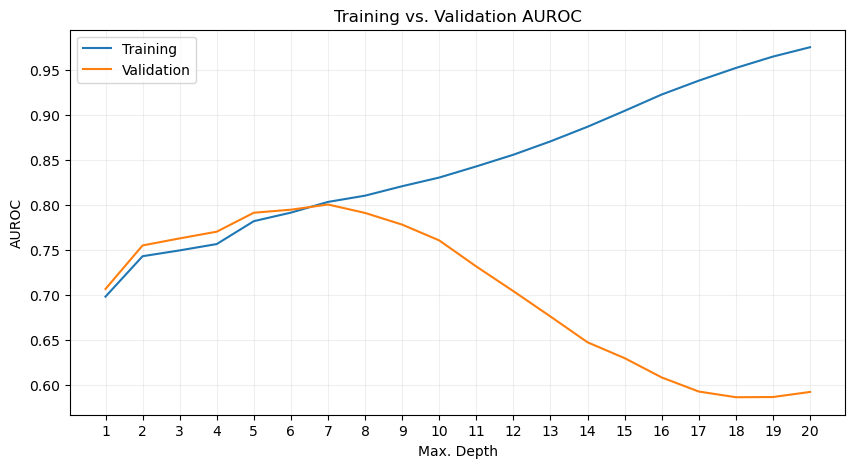

In [124]:
# Графік залежності між AUROC на тренувальних і валідаційних даних і номером ітерації

plt.figure(figsize = (10, 5))
plt.plot(depths_df['max depth'], depths_df['auroc_train'])
plt.plot(depths_df['max depth'], depths_df['auroc_val'])
plt.title('Training vs. Validation AUROC')
plt.xticks(range(1, 21, 1))
plt.xlabel('Max. Depth')
plt.ylabel('AUROC')
plt.legend(['Training', 'Validation'])
plt.grid(alpha = 0.2)
plt.show();

**Висновок**:\
Найкраще (найбільше) значення `AUROC` на валідаційних даних (**80,04%**) спостерігається для **`max_depth` = 7**. При подальому збільшенні `max_depth` відбувається перенавчання (для тренувальних даних `AUROC` продовжує зростати, але для валідаційних починає зменшуватись).

## kNN

In [125]:
# Навчання класифікатора kNN з параметрами за замовчуванням

knn = KNeighborsClassifier()
knn.fit(X_train, train_targets)

KNeighborsClassifier()

In [126]:
# Розрахунок точності на тренувальному і валідаційному наборах за допомогою AUROC

roc_auc_train = predict_and_auroc(knn, X_train, train_targets, 'Training')
roc_auc_val = predict_and_auroc(knn, X_val, val_targets, 'Validation')

AUROC for Training dataset: 92.46%
AUROC for Validation dataset: 72.66%


**Висновок**:\
Враховуючи, що `AUROC` на валідаційних даних (72,66%) значно нижчий, ніж на тренувальних (92,46%), можна зробити висновок, що модель перетренована.  

In [127]:
# Пошук оптимального значення параметра n_neighbors для класифікатора kNN з використанням GridSearchCV

params_knn = {'n_neighbors': np.arange(1, 25)}
knn_gs = GridSearchCV(knn, params_knn, cv=5)
knn_gs.fit(X_train, train_targets)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [128]:
# Найкраща модель, найкраще значення параметра

knn_best = knn_gs.best_estimator_

print(knn_gs.best_params_)

{'n_neighbors': 23}


In [129]:
# Оцінка якості передбачень найкращої моделі knn_best на тренувальній і валідаційній вибірці з допомогою AUROC

roc_auc_train = predict_and_auroc(knn_best, X_train, train_targets, 'Training')
roc_auc_val = predict_and_auroc(knn_best, X_val, val_targets, 'Validation')

AUROC for Training dataset: 84.88%
AUROC for Validation dataset: 76.69%


**Висновок**:\
Модель покращилась в порівнянні з попердньою (AUROC на валідаційному наборі 76,69% проти 72,66%).\
Але результат все ж значно гірший за ті, які показали логістична регресія (80,56%), поліноміальна регресія (79,15%), дерево прийняття рішень (80,04%).

## Алгоритм бустингу XGBoost

Оскільки тут не потрібно виконувати масшабування числових і обробку категоріальних даних, бо це зробить сам алгоритм, використаємо "чисті" тренувальний і валідаційний набори, `train_inputs` і `val_inputs`.  

In [130]:
# Перетворення типу категоріальних даних на categorical у тренувальному і валідаційному наборах

cat_features = train_inputs.select_dtypes(include = 'object').columns.tolist()
train_inputs[cat_features] = train_inputs[cat_features].astype('category')
val_inputs[cat_features] = val_inputs[cat_features].astype('category')

In [131]:
# Тренування ансамблю

xgb_clf = XGBClassifier(
    max_depth = 3,
    n_estimators = 30,
    enable_categorical = True,  # для категорійних ознак
    missing = np.nan,  # явне вказування пропущених значень
)

xgb_clf.fit(train_inputs, train_targets)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=30, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [132]:
# Розрахунок точності на тренувальному і валідаційному наборах за допомогою AUROC

roc_auc_train = predict_and_auroc(xgb_clf, train_inputs, train_targets, 'Training')
roc_auc_val = predict_and_auroc(xgb_clf, val_inputs, val_targets, 'Validation')

AUROC for Training dataset: 81.29%
AUROC for Validation dataset: 81.48%


**Висновок**:\
Значення `AUROC` на валідаційному наборі близьке до того, що на тренувальному – модель добре генералізує.\
В порівнянні зі значеннями `AUROC` на валідаційному наборі в попередніх моделях ця модель кращої якості.

**Використання бібліотеки RandomizedSearchCV для пошуку оптимальних значень гіперпараметрів для XGBoostClassifier**

In [133]:
warnings.filterwarnings('ignore')
    
params_xgb = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'max_leaf_nodes': np.arange(2, 20),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}
search = RandomizedSearchCV(xgb_clf, params_xgb, n_iter = 40, cv = 3, scoring = 'roc_auc', verbose = 0, refit = True)
search.fit(train_inputs, train_targets)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           random_state=None, ...),
                   n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   scoring='roc_auc')

In [134]:
# Найкраща модель, найкращі значення параметрів

xgb_random_search_best = search.best_estimator_

print(search.best_params_)

{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 6, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'entropy'}


In [135]:
# Оцінка якості передбачень xgb_random_search_best на тренувальній і валідаційній вибірці з допомогою AUROC

roc_auc_train = predict_and_auroc(xgb_random_search_best, train_inputs, train_targets, 'Training')
roc_auc_val = predict_and_auroc(xgb_random_search_best, val_inputs, val_targets, 'Validation')

AUROC for Training dataset: 82.88%
AUROC for Validation dataset: 81.04%


**Висновок**:\
Модель добре генералізує.\
Порівнюючи метрику `AUROC` на тренувальних і валідаційних даних з відповідними значеннями, які були знайдені вище в моделі XGBoost з руками підібраними параметрами, можна стверджувати що остання модель трохи гірша.

**Використання бібліотеки Hyperopt для пошуку оптимальних значень гіперпараметрів для XGBoostClassifier**

In [136]:
def objective(params):
    clf = XGBClassifier(
    n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=params['min_child_weight'],  # Мінімальна сума ваг всіх вибірок, необхідна в кінцевому вузлі
        subsample=params['subsample'],  # Частка вибірок, що використовуються для побудови кожного дерева
        colsample_bytree=params['colsample_bytree'],  # Частка ознак, що використовуються при побудові кожного дерева
        gamma=params['gamma'],  # Мінімальне зменшення втрат, необхідне для виконання поділу
        reg_alpha=params['reg_alpha'],  # Параметр регуляризації L1 (Lasso)
        reg_lambda=params['reg_lambda'],  # Параметр регуляризації L2 (Ridge)
        enable_categorical=True,
        missing=np.nan,
        early_stopping_rounds=10
    )

    clf.fit(
        train_inputs,
        train_targets,
        eval_set=[(val_inputs, val_targets)],
        verbose=False)
    pred = clf.predict_proba(val_inputs)[:, 1]
    roc_auc = roc_auc_score(val_targets, pred)

    return {'loss': -roc_auc, 'status': STATUS_OK}

# Простір гіперпараметрів
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 25),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.quniform('max_depth', 3, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'gamma': hp.uniform('gamma', 0, 0.5),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1)
}

# Оптимізація
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=20, trials=trials)

# Перетворення значень гіперпараметрів у кінцеві типи
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])
best['min_child_weight'] = int(best['min_child_weight'])

print("Найкращі гіперпараметри: ", best)

# Навчання фінальної моделі з найкращими гіперпараметрами
final_clf = XGBClassifier(
    n_estimators=best['n_estimators'],
    learning_rate=best['learning_rate'],
    max_depth=best['max_depth'],
    min_child_weight=best['min_child_weight'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    gamma=best['gamma'],
    reg_alpha=best['reg_alpha'],
    reg_lambda=best['reg_lambda'],
    enable_categorical=True,
    missing=np.nan,
)

final_clf.fit(train_inputs, train_targets)

# Розрахунок точності на тренувальному і валідаційному наборах за допомогою AUROC
final_roc_auc_train = predict_and_auroc(final_clf, train_inputs, train_targets, 'Training')
final_roc_auc_val = predict_and_auroc(final_clf, val_inputs, val_targets, 'Validation')

100%|███████████████████████████████████████████████| 20/20 [00:05<00:00,  3.86trial/s, best loss: -0.8155194114117288]
Найкращі гіперпараметри:  {'colsample_bytree': 0.8952523948745865, 'gamma': 0.28744357134880744, 'learning_rate': 0.09431908562651962, 'max_depth': 6, 'min_child_weight': 2, 'n_estimators': 75, 'reg_alpha': 0.5859292940947738, 'reg_lambda': 0.9781282189193636, 'subsample': 0.5689742944398638}
AUROC for Training dataset: 86.21%
AUROC for Validation dataset: 81.23%


**Висновок**:\
Значення `AUROC` на валідаційному наборі досить пристойне в порівнянні з попередніми моделями. Але модель погано генералізує, тому її якість не можна вважати хорошою.

# Таблиця порівняння якості моделей

| Модель | Гіперпараметри | AUROC на тренувальному наборі | AUROC на валідаційному наборі | Коментар |
| --- | --- | --- | --- | --- |
| LogisticRegression | solver='liblinear' | 79.15 | 80.56 |  |
| LogisticRegression with PolynomialFeatures | degree = 2, penalty = 'l1', C = 3, solver = 'liblinear' | 82.96 | 79.15 | Додання поліноміальних ознак не покращило модель.|
| DecisionTreeClassifier | max_depth = 7, random_state = 42 | 80.33 | 80.04 |  |
| KNeighborsClassifier | n_neighbors = 23 | 84.88 | 76.69 | Модель найгіршої якості. |
| XGBClassifier | max_depth = 3, n_estimators = 30, enable_categorical = True, missing = np.nan | 81.29 | 81.48 | Модель найкращої якості. |
| XGBClassifier with RandomizedSearchCV | splitter = 'random', min_samples_split = 5, min_samples_leaf = 1, max_leaf_nodes = 6, max_features = 'log2', max_depth = 4, criterion = 'entropy' | 82.88 | 81.04 |  |
| XGBClassifier with Hyperopt | colsample_bytree = 0.8952523948745865, gamma = 0.28744357134880744, learning_rate = 0.09431908562651962, max_depth = 6, min_child_weight = 2, n_estimators = 75, reg_alpha = 0.5859292940947738, reg_lambda = 0.9781282189193636, subsample = 0.5689742944398638 | 86.21 | 81.23 | Модель погано генераліує. |

**Найкращою з усіх натренованих моделей є XGBoost зі значеннями гіперпараметрів, які були підібрані вручну.**

# Важливість ознак у моделі, яка показала себе найкраще

In [137]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': xgb_clf.feature_importances_
}).sort_values('importance', ascending = False)

importance_df

,feature,importance
17,nr.employed,0.59
13,emp.var.rate,0.14
18,prev_camp_contact_flag,0.11
8,month,0.03
7,contact,0.02
12,poutcome,0.02
16,euribor3m,0.01
4,default,0.01
14,cons.price.idx,0.01
9,day_of_week,0.01


**Висновок**: до топ-3 найважливіших ознак входять економічні показники `nr.employed`, `emp.var.rate` і ознака, яка була додана і показує чи був у попередній кампанії контакт з клієнтом `prev_camp_contact_flag`. Такий пріоритет важливості ознак вважаю адекватним, оскільки атрибути соціально-економічного контексту завжди мають високий вплив на готовність/не готовність людей підписувати депозити, а, як показав попередній аналіз, контакт з клієнтом у попередній кампанії підвищує шанс на позитивний результат у поточній.

# Аналіз впливу ознак на передбачення з допомогою бібліотеки SHAP

Оскільки найкращою виявилась модель XGBoost, тобто модель на основі дерев, для оцінки значень Шеплі можна використати метод TreeSHAP.

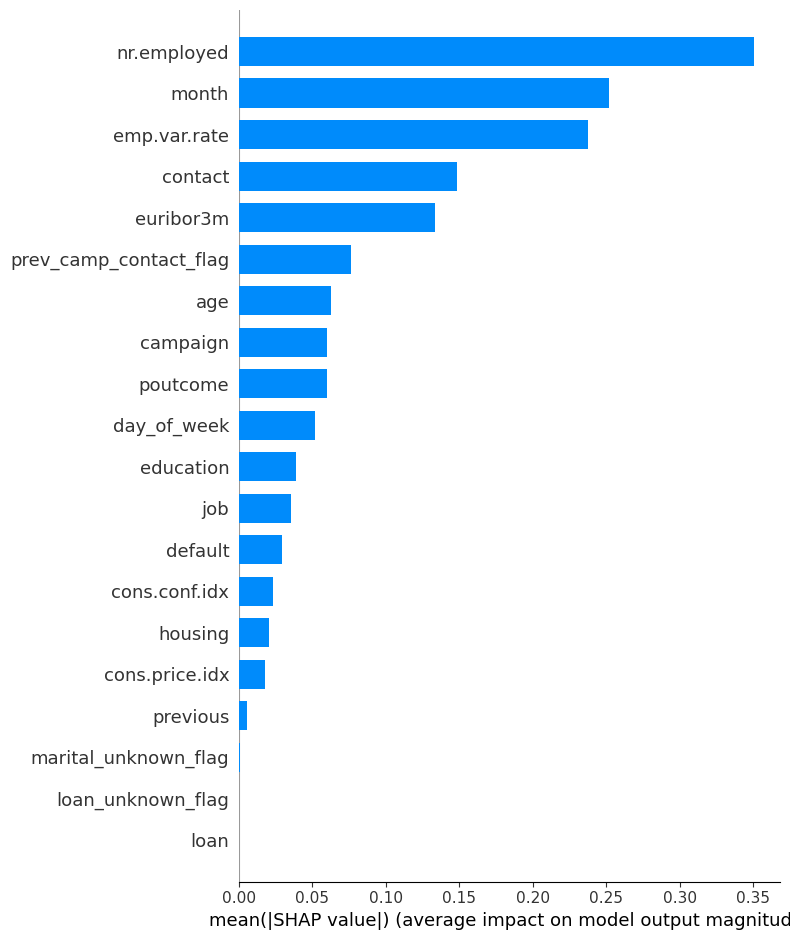

In [138]:
shap_values = shap.TreeExplainer(xgb_clf).shap_values(train_inputs)  # Обчислення значень SHAP
shap.summary_plot(shap_values, train_inputs, plot_type="bar")  # Побудова підсумкового графіка SHAP

**Спостереження**: як і з вбудованим методом feature_importance_ моделі найбільш важливою ознакою є `nr.employed`. Далі порядок важливості ознак дещо відрізняється, але `emp.var.rate`, `contact` і `month` входять до п’ятірки найважливіших і там, і там.

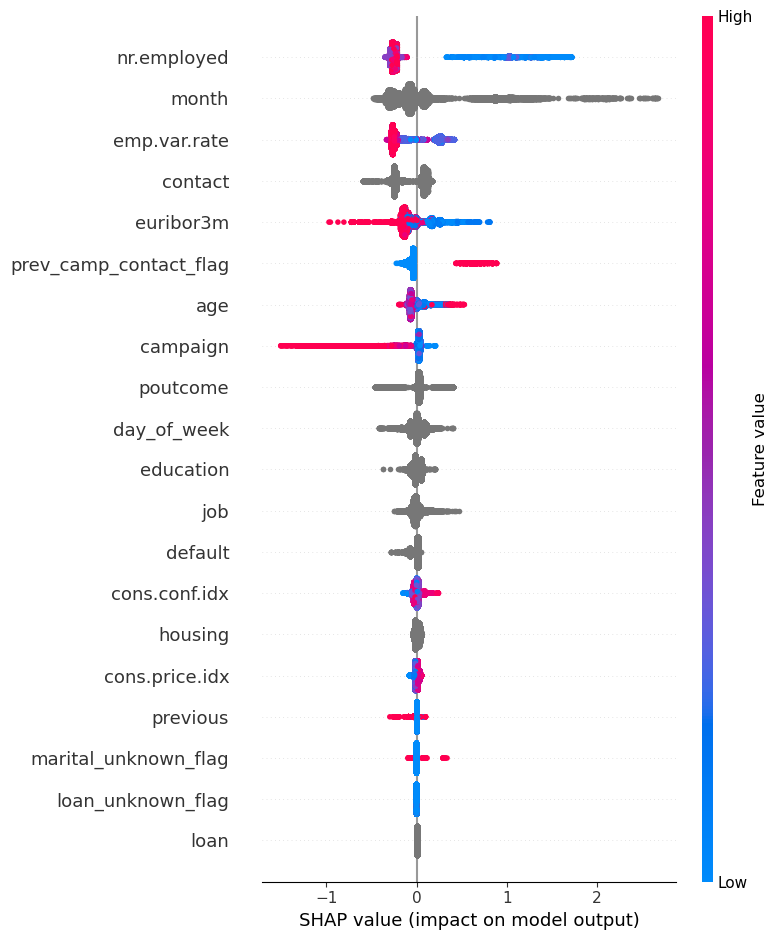

In [139]:
# Візуалізація підсумкових значень SHAP для навчального набору даних
shap.summary_plot(shap_values, train_inputs)

**Спостереження**:\
Низький рівень найпріоритетнішої ознаки `nr.employed` має високий позитивний вплив на готовність клієнта підписати депозит.\
Низький рівень ознаки `euribor3m` має позитивний вплив на цільову змінну. Натомість високий – негативний вплив.\
Високий рівень ознаки `campaign` має високий негативний вплив.

# Аналіз записів, в яких модель помиляється

In [140]:
# Виведення фактичних і передбачених значень

err_df = pd.DataFrame(train_targets.to_numpy(), train_inputs.index, columns=['true'])
ypred = xgb_clf.predict(train_inputs)
err_df['pred'] = ypred
err_df.head(15)

,true,pred
34300,0,0
25076,0,0
17533,0,0
35820,0,0
1080,0,0
38983,0,0
2217,0,0
28462,0,0
39131,0,0
40783,1,0


In [141]:
# Виведення рядків, де модель помиляється

err_df[err_df['true'] != err_df['pred']]

,true,pred
40783,1,0
17109,1,0
40877,1,0
36330,1,0
37543,1,0
...,...,...
2315,1,0
38573,1,0
33926,1,0
40205,0,1


Виведення кількох окремих записів, на яких модель помиляється.

In [142]:
df_1 = df.filter(items=[40783], axis=0)
df_1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40783,33,technician,married,professional.course,no,no,no,cellular,sep,wed,569,1,999,0,nonexistent,-1.10,94.20,-37.50,0.88,4963.60,1


In [143]:
df_2 = df.filter(items=[17109], axis=0)
df_2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
17109,36,services,single,high.school,no,yes,no,cellular,jul,fri,862,1,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,1


In [144]:
df_3 = df.filter(items=[40877], axis=0)
df_3

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40877,22,self-employed,single,professional.course,no,yes,no,cellular,oct,wed,218,1,999,0,nonexistent,-1.10,94.60,-49.50,0.96,4963.60,1


**Спостереження**:\
Аналіз окремих записів, на яких модель помиляється, ні до чого не призводить.\
Можливо, варто розглянути весь датафрейм з записами, в яких модель робить помилку, і проаналізувати значення його полів, пошукати якісь характерні паттерни, якщо такі будуть.